In [7]:


mse = {}
mae = {}
rmse = {}
dates = {}

In [8]:
companies = ['AAPL', 'GOOG', 'MSFT', 'FB', 'AMZN', 'CMCSA', 'TDS', 'CVX', 'KO', 'JNJ', 'MCD', 'PSX',  'CAT', 'PLD', 'INTC', 'DIS', 'TSN', 'KMX', 'XOM', 'AEP', 'C', 'XRAY','WRK', 'KIM', 'CAH', 'MMM', 'HD', 'WM', 'ATVI', 'AON', 'MMC']
companies_1 = ['GOOG', 'FB', 'AMZN', 'CVX', 'KO', 'JNJ', 'MCD', 'PSX',  'CAT', 'PLD', 'INTC', 'DIS', 'TSN', 'KMX', 'XOM', 'AEP', 'C', 'XRAY','WRK', 'KIM', 'CAH', 'MMM', 'HD', 'WM', 'ATVI']

In [9]:
def pred(ticker):
    tick = yf.download(ticker, start='2010-01-01', end='2021-05-21', progress=False)
    
    plt.figure(figsize = (16,8))
    plt.title('Close Price History')
    plt.plot(tick['Close'])
    plt.xlabel('Date')
    plt.ylabel('Close price USD')
    plt.savefig('real stock ' + ticker + '.jpeg')
    
    
    # Создаем новый датафрейм только с колонкой "Close"
    data = tick.filter(['Close'])
    # преобразовываем в нумпаевский массив
    dataset = data.values
    # Вытаскиваем количество строк в дате для обучения модели (LSTM)
    training_data_len = math.ceil(len(dataset) * .8)
    
    #Scale the data (масштабируем)
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset) 
    
    # Создаем датасет для обучения
    train_data = scaled_data[0:training_data_len]
    # разбиваем на x underscore train и y underscore train 
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i])
        y_train.append(train_data[i])

    #Конвертируем x_train и y_train в нумпаевский массив
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],x_train.shape[2]))
    
    #Строим нейронку
    model = Sequential()
    model.add(GRU(50,return_sequences = True, input_shape = (x_train.shape[1],x_train.shape[2])))
    model.add(GRU(50,return_sequences = False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='sgd',loss = 'mean_squared_error')
    
    model.fit(x_train,y_train,batch_size = 71, epochs = 200)
    
    #Создаем тестовый датасет
    test_data = scaled_data[training_data_len - 60:]

    #по аналогии создаем x_test и y_test 
    x_test = []
    y_test = dataset[training_data_len:]
    for i in range(60,len(test_data)):
        x_test.append(test_data[i-60:i])
    
    x_test = np.array(x_test)
    
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],x_test.shape[2]))
    
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    
    print("MSE: ", np.mean((predictions - y_test)**2))
    print("MAE: ", np.mean(abs(predictions - y_test)))
    print("RMSE: ", np.sqrt(np.mean((predictions-y_test)**2)))
    mse[ticker] = np.mean((predictions - y_test)**2)
    mae[ticker] = np.mean(abs(predictions - y_test))
    rmse[ticker] = np.sqrt(np.mean((predictions-y_test)**2))
                            
        #Строим график
    #train = data[:training_data_len]
    valid = data[training_data_len: ]
    valid['Predictions'] = predictions
    print(valid)
    dates[ticker] = valid
    #Визуализируем
    plt.figure(figsize=(16,8))
    plt.title('Model LSTM')
    plt.xlabel('Date', fontsize = 18)
    plt.ylabel('Close Price',fontsize = 18)
    #plt.plot(train['Close'])
    plt.plot(valid[['Close','Predictions']])
    plt.legend(['Train','Val','Pred'], loc = 'lower right')
    plt.savefig('prediction_' + ticker + '.jpeg')

Epoch 1/200
32/32 [==============================] - 9s 55ms/step - loss: 0.0085
Epoch 2/200
32/32 [==============================] - 2s 57ms/step - loss: 0.0046
Epoch 3/200
32/32 [==============================] - 2s 56ms/step - loss: 0.0045
Epoch 4/200
32/32 [==============================] - 2s 58ms/step - loss: 0.0040
Epoch 5/200
32/32 [==============================] - 2s 57ms/step - loss: 0.0039
Epoch 6/200
32/32 [==============================] - 2s 55ms/step - loss: 0.0037
Epoch 7/200
32/32 [==============================] - 2s 55ms/step - loss: 0.0035
Epoch 8/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0032
Epoch 9/200
32/32 [==============================] - 2s 55ms/step - loss: 0.0030
Epoch 10/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0028
Epoch 11/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0027
Epoch 12/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0026
Epoch 13/200
32/32 [=====

32/32 [==============================] - 2s 53ms/step - loss: 2.5827e-05
Epoch 192/200
32/32 [==============================] - 2s 52ms/step - loss: 2.5418e-05
Epoch 193/200
32/32 [==============================] - 2s 55ms/step - loss: 2.7601e-05
Epoch 194/200
32/32 [==============================] - 2s 51ms/step - loss: 2.7283e-05
Epoch 195/200
32/32 [==============================] - 2s 51ms/step - loss: 2.7755e-05
Epoch 196/200
32/32 [==============================] - 2s 51ms/step - loss: 2.7903e-05
Epoch 197/200
32/32 [==============================] - 2s 51ms/step - loss: 2.7608e-05
Epoch 198/200
32/32 [==============================] - 2s 51ms/step - loss: 2.7569e-05
Epoch 199/200
32/32 [==============================] - 2s 51ms/step - loss: 2.4970e-05
Epoch 200/200
32/32 [==============================] - 2s 51ms/step - loss: 2.6512e-05
MSE:  11.911013758275327
MAE:  2.463305641427298
RMSE:  3.4512336574441504
                 Close  Predictions
Date                             

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 6s 48ms/step - loss: 0.0203
Epoch 2/200
32/32 [==============================] - 2s 50ms/step - loss: 0.0121
Epoch 3/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0108
Epoch 4/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0096
Epoch 5/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0084
Epoch 6/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0075
Epoch 7/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0065
Epoch 8/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0060
Epoch 9/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0052
Epoch 10/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0046
Epoch 11/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0040
Epoch 12/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0036
Epoch 13/200
32/32 [=====

32/32 [==============================] - 2s 52ms/step - loss: 4.8126e-05
Epoch 192/200
32/32 [==============================] - 2s 53ms/step - loss: 5.1630e-05
Epoch 193/200
32/32 [==============================] - 2s 53ms/step - loss: 4.5688e-05
Epoch 194/200
32/32 [==============================] - 2s 51ms/step - loss: 4.6440e-05
Epoch 195/200
32/32 [==============================] - 2s 50ms/step - loss: 4.6769e-05
Epoch 196/200
32/32 [==============================] - 2s 50ms/step - loss: 4.6667e-05
Epoch 197/200
32/32 [==============================] - 2s 52ms/step - loss: 4.7294e-05
Epoch 198/200
32/32 [==============================] - 2s 50ms/step - loss: 4.9384e-05
Epoch 199/200
32/32 [==============================] - 2s 51ms/step - loss: 5.4338e-05
Epoch 200/200
32/32 [==============================] - 2s 52ms/step - loss: 4.5021e-05
MSE:  2281.315280167142
MAE:  34.17056844288558
RMSE:  47.7631163154912
                  Close  Predictions
Date                               

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 6s 48ms/step - loss: 0.0106
Epoch 2/200
32/32 [==============================] - 2s 48ms/step - loss: 0.0069
Epoch 3/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0065
Epoch 4/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0065
Epoch 5/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0060
Epoch 6/200
32/32 [==============================] - 2s 55ms/step - loss: 0.0054
Epoch 7/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0049
Epoch 8/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0047
Epoch 9/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0041
Epoch 10/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0037
Epoch 11/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0034
Epoch 12/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0032
Epoch 13/200
32/32 [=====

32/32 [==============================] - 2s 53ms/step - loss: 2.2569e-05
Epoch 192/200
32/32 [==============================] - 2s 53ms/step - loss: 2.2534e-05
Epoch 193/200
32/32 [==============================] - 2s 52ms/step - loss: 2.2503e-05
Epoch 194/200
32/32 [==============================] - 2s 51ms/step - loss: 2.2873e-05
Epoch 195/200
32/32 [==============================] - 2s 51ms/step - loss: 2.2223e-05
Epoch 196/200
32/32 [==============================] - 2s 51ms/step - loss: 2.1674e-05
Epoch 197/200
32/32 [==============================] - 2s 51ms/step - loss: 2.1995e-05
Epoch 198/200
32/32 [==============================] - 2s 51ms/step - loss: 1.8877e-05
Epoch 199/200
32/32 [==============================] - 2s 51ms/step - loss: 2.0843e-05
Epoch 200/200
32/32 [==============================] - 2s 51ms/step - loss: 2.1571e-05
MSE:  29.21462729250944
MAE:  3.9495516206165466
RMSE:  5.4050557159486745
                 Close  Predictions
Date                             

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
25/25 [==============================] - 5s 49ms/step - loss: 0.0471
Epoch 2/200
25/25 [==============================] - 1s 48ms/step - loss: 0.0188
Epoch 3/200
25/25 [==============================] - 1s 50ms/step - loss: 0.0154
Epoch 4/200
25/25 [==============================] - 1s 47ms/step - loss: 0.0135
Epoch 5/200
25/25 [==============================] - 1s 50ms/step - loss: 0.0114
Epoch 6/200
25/25 [==============================] - 1s 50ms/step - loss: 0.0097
Epoch 7/200
25/25 [==============================] - 1s 50ms/step - loss: 0.0081
Epoch 8/200
25/25 [==============================] - 1s 50ms/step - loss: 0.0067
Epoch 9/200
25/25 [==============================] - 1s 51ms/step - loss: 0.0054
Epoch 10/200
25/25 [==============================] - 1s 52ms/step - loss: 0.0045
Epoch 11/200
25/25 [==============================] - 1s 52ms/step - loss: 0.0038
Epoch 12/200
25/25 [==============================] - 1s 53ms/step - loss: 0.0029
Epoch 13/200
25/25 [=====

25/25 [==============================] - 1s 49ms/step - loss: 1.0037e-04
Epoch 98/200
25/25 [==============================] - 1s 51ms/step - loss: 1.1165e-04
Epoch 99/200
25/25 [==============================] - 1s 51ms/step - loss: 1.2892e-04
Epoch 100/200
25/25 [==============================] - 1s 52ms/step - loss: 1.0639e-04
Epoch 101/200
25/25 [==============================] - 1s 52ms/step - loss: 1.1077e-04
Epoch 102/200
25/25 [==============================] - 1s 52ms/step - loss: 1.0213e-04
Epoch 103/200
25/25 [==============================] - 1s 52ms/step - loss: 1.1323e-04
Epoch 104/200
25/25 [==============================] - 1s 55ms/step - loss: 1.0909e-04
Epoch 105/200
25/25 [==============================] - 1s 54ms/step - loss: 1.1037e-04
Epoch 106/200
25/25 [==============================] - 1s 54ms/step - loss: 1.1383e-04
Epoch 107/200
25/25 [==============================] - 1s 53ms/step - loss: 1.0927e-04
Epoch 108/200
25/25 [==============================] - 1s 5

25/25 [==============================] - 1s 53ms/step - loss: 9.9819e-05
Epoch 192/200
25/25 [==============================] - 1s 52ms/step - loss: 1.1501e-04
Epoch 193/200
25/25 [==============================] - 1s 53ms/step - loss: 1.0141e-04
Epoch 194/200
25/25 [==============================] - 1s 53ms/step - loss: 1.1347e-04
Epoch 195/200
25/25 [==============================] - 1s 52ms/step - loss: 1.1259e-04
Epoch 196/200
25/25 [==============================] - 1s 53ms/step - loss: 1.0653e-04
Epoch 197/200
25/25 [==============================] - 1s 52ms/step - loss: 1.0210e-04
Epoch 198/200
25/25 [==============================] - 1s 52ms/step - loss: 1.0617e-04
Epoch 199/200
25/25 [==============================] - 1s 52ms/step - loss: 1.1952e-04
Epoch 200/200
25/25 [==============================] - 1s 51ms/step - loss: 1.4236e-04
MSE:  66.13235613487807
MAE:  6.06698685871318
RMSE:  8.132180281749665
                 Close  Predictions
Date                               


<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 5s 48ms/step - loss: 0.0191
Epoch 2/200
32/32 [==============================] - 2s 49ms/step - loss: 0.0135
Epoch 3/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0127
Epoch 4/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0113
Epoch 5/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0107
Epoch 6/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0094
Epoch 7/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0083
Epoch 8/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0077
Epoch 9/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0070
Epoch 10/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0061
Epoch 11/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0054
Epoch 12/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0050
Epoch 13/200
32/32 [=====

32/32 [==============================] - 2s 51ms/step - loss: 3.7203e-05
Epoch 192/200
32/32 [==============================] - 2s 52ms/step - loss: 4.1865e-05
Epoch 193/200
32/32 [==============================] - 2s 50ms/step - loss: 4.8732e-05
Epoch 194/200
32/32 [==============================] - 2s 52ms/step - loss: 4.8938e-05
Epoch 195/200
32/32 [==============================] - 2s 52ms/step - loss: 4.0736e-05
Epoch 196/200
32/32 [==============================] - 2s 53ms/step - loss: 4.2224e-05
Epoch 197/200
32/32 [==============================] - 2s 53ms/step - loss: 4.1051e-05
Epoch 198/200
32/32 [==============================] - 2s 53ms/step - loss: 4.2250e-05
Epoch 199/200
32/32 [==============================] - 2s 52ms/step - loss: 4.7059e-05
Epoch 200/200
32/32 [==============================] - 2s 52ms/step - loss: 4.0739e-05
MSE:  5805.304201959992
MAE:  54.76715631135471
RMSE:  76.1925468924618
                  Close  Predictions
Date                               

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 5s 48ms/step - loss: 0.0592
Epoch 2/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0234
Epoch 3/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0204
Epoch 4/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0180
Epoch 5/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0152
Epoch 6/200
32/32 [==============================] - 2s 55ms/step - loss: 0.0136
Epoch 7/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0117
Epoch 8/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0095
Epoch 9/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0079
Epoch 10/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0066
Epoch 11/200
32/32 [==============================] - 2s 50ms/step - loss: 0.0054
Epoch 12/200
32/32 [==============================] - 2s 50ms/step - loss: 0.0042
Epoch 13/200
32/32 [=====

32/32 [==============================] - 2s 50ms/step - loss: 1.0126e-04
Epoch 192/200
32/32 [==============================] - 2s 51ms/step - loss: 9.4864e-05
Epoch 193/200
32/32 [==============================] - 2s 51ms/step - loss: 1.0459e-04
Epoch 194/200
32/32 [==============================] - 2s 50ms/step - loss: 1.0724e-04
Epoch 195/200
32/32 [==============================] - 2s 50ms/step - loss: 1.0503e-04
Epoch 196/200
32/32 [==============================] - 2s 50ms/step - loss: 1.0106e-04
Epoch 197/200
32/32 [==============================] - 2s 51ms/step - loss: 1.0390e-04
Epoch 198/200
32/32 [==============================] - 2s 52ms/step - loss: 1.0050e-04
Epoch 199/200
32/32 [==============================] - 2s 52ms/step - loss: 1.0450e-04
Epoch 200/200
32/32 [==============================] - 2s 53ms/step - loss: 1.0650e-04
MSE:  1.2011281942240049
MAE:  0.8411950316104589
RMSE:  1.0959599418883907
                Close  Predictions
Date                             

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 5s 46ms/step - loss: 0.0535
Epoch 2/200
32/32 [==============================] - 2s 49ms/step - loss: 0.0086
Epoch 3/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0072
Epoch 4/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0061
Epoch 5/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0054
Epoch 6/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0049
Epoch 7/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0043
Epoch 8/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0036
Epoch 9/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0031
Epoch 10/200
32/32 [==============================] - 2s 50ms/step - loss: 0.0028
Epoch 11/200
32/32 [==============================] - 2s 50ms/step - loss: 0.0025
Epoch 12/200
32/32 [==============================] - 2s 50ms/step - loss: 0.0023
Epoch 13/200
32/32 [=====

32/32 [==============================] - 2s 52ms/step - loss: 0.0012
Epoch 102/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0013
Epoch 103/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0013
Epoch 104/200
32/32 [==============================] - 2s 55ms/step - loss: 0.0012
Epoch 105/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0013
Epoch 106/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0012
Epoch 107/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0013
Epoch 108/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0012
Epoch 109/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0012
Epoch 110/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0013
Epoch 111/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0012
Epoch 112/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0011
Epoch 113/200
32/3

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 5s 50ms/step - loss: 0.0939
Epoch 2/200
32/32 [==============================] - 2s 49ms/step - loss: 0.0123
Epoch 3/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0106
Epoch 4/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0085
Epoch 5/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0070
Epoch 6/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0058
Epoch 7/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0047
Epoch 8/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0040
Epoch 9/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0031
Epoch 10/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0025
Epoch 11/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0020
Epoch 12/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0018
Epoch 13/200
32/32 [=====

32/32 [==============================] - 2s 51ms/step - loss: 7.1726e-04
Epoch 191/200
32/32 [==============================] - 2s 50ms/step - loss: 6.6632e-04
Epoch 192/200
32/32 [==============================] - 2s 50ms/step - loss: 6.6662e-04
Epoch 193/200
32/32 [==============================] - 2s 50ms/step - loss: 6.9834e-04
Epoch 194/200
32/32 [==============================] - 2s 50ms/step - loss: 6.7826e-04
Epoch 195/200
32/32 [==============================] - 1s 40ms/step - loss: 6.7919e-04
Epoch 196/200
32/32 [==============================] - 1s 37ms/step - loss: 6.7777e-04
Epoch 197/200
32/32 [==============================] - 1s 38ms/step - loss: 6.9393e-04
Epoch 198/200
32/32 [==============================] - 1s 37ms/step - loss: 7.3407e-04
Epoch 199/200
32/32 [==============================] - 1s 37ms/step - loss: 6.4251e-04
Epoch 200/200
32/32 [==============================] - 2s 48ms/step - loss: 6.8401e-04
MSE:  10.98268878857825
MAE:  2.314673685070524
RMSE:  3.

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 6s 47ms/step - loss: 0.0652
Epoch 2/200
32/32 [==============================] - 2s 47ms/step - loss: 0.0169
Epoch 3/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0150
Epoch 4/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0131
Epoch 5/200
32/32 [==============================] - 2s 50ms/step - loss: 0.0112
Epoch 6/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0101
Epoch 7/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0096
Epoch 8/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0077
Epoch 9/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0063
Epoch 10/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0059
Epoch 11/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0050
Epoch 12/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0043
Epoch 13/200
32/32 [=====

32/32 [==============================] - 2s 52ms/step - loss: 2.4023e-04
Epoch 192/200
32/32 [==============================] - 2s 52ms/step - loss: 2.4131e-04
Epoch 193/200
32/32 [==============================] - 2s 53ms/step - loss: 2.2814e-04
Epoch 194/200
32/32 [==============================] - 2s 53ms/step - loss: 2.3648e-04
Epoch 195/200
32/32 [==============================] - 2s 52ms/step - loss: 2.3491e-04
Epoch 196/200
32/32 [==============================] - 2s 51ms/step - loss: 2.2775e-04
Epoch 197/200
32/32 [==============================] - 2s 51ms/step - loss: 2.2930e-04
Epoch 198/200
32/32 [==============================] - 2s 51ms/step - loss: 2.3824e-04
Epoch 199/200
32/32 [==============================] - 2s 51ms/step - loss: 2.2826e-04
Epoch 200/200
32/32 [==============================] - 2s 51ms/step - loss: 2.3462e-04
MSE:  1.5487935124000192
MAE:  0.8243052564158282
RMSE:  1.2445053283935827
                Close  Predictions
Date                             

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 5s 48ms/step - loss: 0.0807
Epoch 2/200
32/32 [==============================] - 2s 49ms/step - loss: 0.0353
Epoch 3/200
32/32 [==============================] - 1s 42ms/step - loss: 0.0286
Epoch 4/200
32/32 [==============================] - 1s 38ms/step - loss: 0.0230
Epoch 5/200
32/32 [==============================] - 1s 37ms/step - loss: 0.0177
Epoch 6/200
32/32 [==============================] - 1s 38ms/step - loss: 0.0132
Epoch 7/200
32/32 [==============================] - 1s 38ms/step - loss: 0.0099
Epoch 8/200
32/32 [==============================] - 1s 40ms/step - loss: 0.0072
Epoch 9/200
32/32 [==============================] - 2s 50ms/step - loss: 0.0049
Epoch 10/200
32/32 [==============================] - 2s 50ms/step - loss: 0.0034
Epoch 11/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0024
Epoch 12/200
32/32 [==============================] - 2s 50ms/step - loss: 0.0015
Epoch 13/200
32/32 [=====

Epoch 97/200
32/32 [==============================] - 2s 53ms/step - loss: 1.4489e-04
Epoch 98/200
32/32 [==============================] - 2s 52ms/step - loss: 1.5536e-04
Epoch 99/200
32/32 [==============================] - 2s 55ms/step - loss: 1.4437e-04
Epoch 100/200
32/32 [==============================] - 2s 52ms/step - loss: 1.4777e-04
Epoch 101/200
32/32 [==============================] - 2s 52ms/step - loss: 1.5561e-04
Epoch 102/200
32/32 [==============================] - 2s 53ms/step - loss: 1.5508e-04
Epoch 103/200
32/32 [==============================] - 2s 51ms/step - loss: 1.6658e-04: 
Epoch 104/200
32/32 [==============================] - 2s 51ms/step - loss: 1.4140e-04
Epoch 105/200
32/32 [==============================] - 2s 51ms/step - loss: 1.6910e-04
Epoch 106/200
32/32 [==============================] - 2s 50ms/step - loss: 1.6604e-04
Epoch 107/200
32/32 [==============================] - 2s 50ms/step - loss: 1.6264e-04
Epoch 108/200
32/32 [=======================

Epoch 191/200
32/32 [==============================] - 2s 51ms/step - loss: 1.5237e-04
Epoch 192/200
32/32 [==============================] - 2s 57ms/step - loss: 1.3874e-04
Epoch 193/200
32/32 [==============================] - 2s 53ms/step - loss: 1.5975e-04
Epoch 194/200
32/32 [==============================] - 2s 53ms/step - loss: 1.6076e-04
Epoch 195/200
32/32 [==============================] - 2s 53ms/step - loss: 1.4776e-04
Epoch 196/200
32/32 [==============================] - 2s 53ms/step - loss: 1.6051e-04
Epoch 197/200
32/32 [==============================] - 2s 53ms/step - loss: 1.7752e-04
Epoch 198/200
32/32 [==============================] - 2s 52ms/step - loss: 1.4712e-04
Epoch 199/200
32/32 [==============================] - 2s 51ms/step - loss: 1.5801e-04
Epoch 200/200
32/32 [==============================] - 2s 51ms/step - loss: 1.5018e-04
MSE:  8.070409575817752
MAE:  2.073656358435932
RMSE:  2.840846630111832
                 Close  Predictions
Date                 

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions
<ipython-input-9-1ce16dc0e674>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (16,8))


Epoch 1/200
32/32 [==============================] - 5s 47ms/step - loss: 0.0404
Epoch 2/200
32/32 [==============================] - 2s 49ms/step - loss: 0.0187
Epoch 3/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0160
Epoch 4/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0129
Epoch 5/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0109
Epoch 6/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0088
Epoch 7/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0075
Epoch 8/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0056
Epoch 9/200
32/32 [==============================] - 2s 56ms/step - loss: 0.0045
Epoch 10/200
32/32 [==============================] - 2s 57ms/step - loss: 0.0036
Epoch 11/200
32/32 [==============================] - 2s 56ms/step - loss: 0.0028
Epoch 12/200
32/32 [==============================] - 2s 55ms/step - loss: 0.0021
Epoch 13/200
32/32 [=====

32/32 [==============================] - 2s 51ms/step - loss: 9.0316e-05:
Epoch 98/200
32/32 [==============================] - 2s 51ms/step - loss: 9.9773e-05
Epoch 99/200
32/32 [==============================] - 2s 51ms/step - loss: 9.1401e-05
Epoch 100/200
32/32 [==============================] - 2s 52ms/step - loss: 9.2578e-05
Epoch 101/200
32/32 [==============================] - 2s 54ms/step - loss: 9.1737e-05
Epoch 102/200
32/32 [==============================] - 2s 54ms/step - loss: 8.9063e-05
Epoch 103/200
32/32 [==============================] - 2s 53ms/step - loss: 9.1801e-05
Epoch 104/200
32/32 [==============================] - 2s 53ms/step - loss: 9.7148e-05
Epoch 105/200
32/32 [==============================] - 2s 52ms/step - loss: 8.8405e-05
Epoch 106/200
32/32 [==============================] - 2s 51ms/step - loss: 9.7559e-05
Epoch 107/200
32/32 [==============================] - 2s 51ms/step - loss: 8.7048e-05
Epoch 108/200
32/32 [==============================] - 2s 

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
25/25 [==============================] - 5s 47ms/step - loss: 0.1343
Epoch 2/200
25/25 [==============================] - 1s 50ms/step - loss: 0.0245
Epoch 3/200
25/25 [==============================] - 1s 53ms/step - loss: 0.0212
Epoch 4/200
25/25 [==============================] - 1s 52ms/step - loss: 0.0197
Epoch 5/200
25/25 [==============================] - 1s 51ms/step - loss: 0.0177
Epoch 6/200
25/25 [==============================] - 1s 51ms/step - loss: 0.0161
Epoch 7/200
25/25 [==============================] - 1s 52ms/step - loss: 0.0131
Epoch 8/200
25/25 [==============================] - 1s 53ms/step - loss: 0.0124
Epoch 9/200
25/25 [==============================] - 1s 53ms/step - loss: 0.0115
Epoch 10/200
25/25 [==============================] - 1s 53ms/step - loss: 0.0098
Epoch 11/200
25/25 [==============================] - 1s 53ms/step - loss: 0.0083
Epoch 12/200
25/25 [==============================] - 1s 53ms/step - loss: 0.0074
Epoch 13/200
25/25 [=====

25/25 [==============================] - 1s 50ms/step - loss: 3.9471e-04
Epoch 192/200
25/25 [==============================] - 1s 50ms/step - loss: 3.9660e-04
Epoch 193/200
25/25 [==============================] - 1s 51ms/step - loss: 4.0040e-04
Epoch 194/200
25/25 [==============================] - 1s 50ms/step - loss: 4.0155e-04
Epoch 195/200
25/25 [==============================] - 1s 50ms/step - loss: 3.8467e-04
Epoch 196/200
25/25 [==============================] - 1s 53ms/step - loss: 4.0719e-04
Epoch 197/200
25/25 [==============================] - 1s 53ms/step - loss: 3.8462e-04
Epoch 198/200
25/25 [==============================] - 1s 52ms/step - loss: 4.1458e-04
Epoch 199/200
25/25 [==============================] - 1s 52ms/step - loss: 3.6792e-04
Epoch 200/200
25/25 [==============================] - 1s 52ms/step - loss: 4.0905e-04
MSE:  10.556628667745906
MAE:  2.3452787607517824
RMSE:  3.2490965925539834
                 Close  Predictions
Date                            

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 5s 47ms/step - loss: 0.0406
Epoch 2/200
32/32 [==============================] - 2s 49ms/step - loss: 0.0146
Epoch 3/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0143
Epoch 4/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0130
Epoch 5/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0124
Epoch 6/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0111
Epoch 7/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0104
Epoch 8/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0102
Epoch 9/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0100
Epoch 10/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0090
Epoch 11/200
32/32 [==============================] - 2s 50ms/step - loss: 0.0084
Epoch 12/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0074
Epoch 13/200
32/32 [=====

32/32 [==============================] - 2s 52ms/step - loss: 1.7780e-04
Epoch 192/200
32/32 [==============================] - 2s 52ms/step - loss: 1.6310e-04
Epoch 193/200
32/32 [==============================] - 2s 53ms/step - loss: 1.7968e-04
Epoch 194/200
32/32 [==============================] - 2s 51ms/step - loss: 1.7360e-04
Epoch 195/200
32/32 [==============================] - 2s 50ms/step - loss: 1.9023e-04
Epoch 196/200
32/32 [==============================] - 2s 52ms/step - loss: 1.7755e-04
Epoch 197/200
32/32 [==============================] - 2s 50ms/step - loss: 1.7877e-04
Epoch 198/200
32/32 [==============================] - 2s 50ms/step - loss: 1.7465e-04
Epoch 199/200
32/32 [==============================] - 2s 50ms/step - loss: 1.7515e-04
Epoch 200/200
32/32 [==============================] - 2s 54ms/step - loss: 1.7728e-04
MSE:  23.215838617595836
MAE:  3.6433134495067763
RMSE:  4.818281707994649
                 Close  Predictions
Date                             

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 7s 51ms/step - loss: 0.0208
Epoch 2/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0095
Epoch 3/200
32/32 [==============================] - 2s 50ms/step - loss: 0.0086
Epoch 4/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0074
Epoch 5/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0064
Epoch 6/200
32/32 [==============================] - 2s 50ms/step - loss: 0.0056
Epoch 7/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0048
Epoch 8/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0044
Epoch 9/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0037
Epoch 10/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0031
Epoch 11/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0027
Epoch 12/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0022
Epoch 13/200
32/32 [=====

32/32 [==============================] - 2s 52ms/step - loss: 1.0678e-04
Epoch 98/200
32/32 [==============================] - 2s 50ms/step - loss: 1.0290e-04
Epoch 99/200
32/32 [==============================] - 2s 50ms/step - loss: 1.1201e-04
Epoch 100/200
32/32 [==============================] - 2s 51ms/step - loss: 1.0849e-04
Epoch 101/200
32/32 [==============================] - 2s 51ms/step - loss: 1.0176e-04
Epoch 102/200
32/32 [==============================] - 2s 51ms/step - loss: 1.0245e-04
Epoch 103/200
32/32 [==============================] - 2s 53ms/step - loss: 1.0958e-04
Epoch 104/200
32/32 [==============================] - 2s 53ms/step - loss: 1.0826e-04
Epoch 105/200
32/32 [==============================] - 2s 53ms/step - loss: 1.0360e-04
Epoch 106/200
32/32 [==============================] - 2s 53ms/step - loss: 1.1182e-04
Epoch 107/200
32/32 [==============================] - 2s 51ms/step - loss: 1.0697e-04
Epoch 108/200
32/32 [==============================] - 1s 4

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 6s 48ms/step - loss: 0.0481
Epoch 2/200
32/32 [==============================] - 2s 48ms/step - loss: 0.0251
Epoch 3/200
32/32 [==============================] - 2s 50ms/step - loss: 0.0203
Epoch 4/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0175
Epoch 5/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0140
Epoch 6/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0117
Epoch 7/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0095
Epoch 8/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0074
Epoch 9/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0060
Epoch 10/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0047
Epoch 11/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0035
Epoch 12/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0026
Epoch 13/200
32/32 [=====

32/32 [==============================] - 2s 53ms/step - loss: 2.3165e-04
Epoch 98/200
32/32 [==============================] - 2s 53ms/step - loss: 2.2155e-04
Epoch 99/200
32/32 [==============================] - 2s 54ms/step - loss: 2.3482e-04
Epoch 100/200
32/32 [==============================] - 2s 53ms/step - loss: 2.2038e-04
Epoch 101/200
32/32 [==============================] - 2s 50ms/step - loss: 2.3571e-04
Epoch 102/200
32/32 [==============================] - 2s 51ms/step - loss: 2.1430e-04
Epoch 103/200
32/32 [==============================] - 2s 52ms/step - loss: 2.3123e-04
Epoch 104/200
32/32 [==============================] - 2s 51ms/step - loss: 2.3951e-04
Epoch 105/200
32/32 [==============================] - 2s 51ms/step - loss: 2.2181e-04
Epoch 106/200
32/32 [==============================] - 2s 51ms/step - loss: 2.0386e-04
Epoch 107/200
32/32 [==============================] - 2s 51ms/step - loss: 2.1332e-04
Epoch 108/200
32/32 [==============================] - 2s 5

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 5s 48ms/step - loss: 0.0395
Epoch 2/200
32/32 [==============================] - 2s 50ms/step - loss: 0.0179
Epoch 3/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0152
Epoch 4/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0124
Epoch 5/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0105
Epoch 6/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0088
Epoch 7/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0069
Epoch 8/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0057
Epoch 9/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0045
Epoch 10/200
32/32 [==============================] - 2s 55ms/step - loss: 0.0036
Epoch 11/200
32/32 [==============================] - 2s 52ms/step - loss: 0.0027
Epoch 12/200
32/32 [==============================] - 2s 51ms/step - loss: 0.0022
Epoch 13/200
32/32 [=====

32/32 [==============================] - 2s 51ms/step - loss: 8.3408e-05
Epoch 98/200
32/32 [==============================] - 2s 50ms/step - loss: 7.4605e-05
Epoch 99/200
32/32 [==============================] - 2s 51ms/step - loss: 7.0505e-05
Epoch 100/200
32/32 [==============================] - 2s 51ms/step - loss: 7.6662e-05
Epoch 101/200
32/32 [==============================] - 2s 52ms/step - loss: 8.1422e-05
Epoch 102/200
32/32 [==============================] - 2s 55ms/step - loss: 8.2805e-05
Epoch 103/200
32/32 [==============================] - 2s 55ms/step - loss: 7.6133e-05
Epoch 104/200
32/32 [==============================] - 2s 54ms/step - loss: 7.7579e-05
Epoch 105/200
32/32 [==============================] - 2s 54ms/step - loss: 7.6791e-05
Epoch 106/200
32/32 [==============================] - 2s 54ms/step - loss: 7.7681e-05
Epoch 107/200
32/32 [==============================] - 2s 53ms/step - loss: 8.2422e-05
Epoch 108/200
32/32 [==============================] - 2s 5

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 4s 31ms/step - loss: 0.0977
Epoch 2/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0317
Epoch 3/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0192
Epoch 4/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0105
Epoch 5/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0057
Epoch 6/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0029
Epoch 7/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0014
Epoch 8/200
32/32 [==============================] - 1s 30ms/step - loss: 7.6476e-04
Epoch 9/200
32/32 [==============================] - 1s 30ms/step - loss: 4.5669e-04
Epoch 10/200
32/32 [==============================] - 1s 30ms/step - loss: 3.1604e-04
Epoch 11/200
32/32 [==============================] - 1s 31ms/step - loss: 2.6778e-04
Epoch 12/200
32/32 [==============================] - 1s 31ms/step - loss: 2.4301e-04
Epoch

32/32 [==============================] - 1s 32ms/step - loss: 2.0833e-04
Epoch 191/200
32/32 [==============================] - 1s 32ms/step - loss: 2.1040e-04
Epoch 192/200
32/32 [==============================] - 1s 32ms/step - loss: 1.9511e-04
Epoch 193/200
32/32 [==============================] - 1s 33ms/step - loss: 2.0403e-04
Epoch 194/200
32/32 [==============================] - 1s 32ms/step - loss: 2.0629e-04
Epoch 195/200
32/32 [==============================] - 1s 32ms/step - loss: 2.2913e-04
Epoch 196/200
32/32 [==============================] - 1s 32ms/step - loss: 2.0770e-04
Epoch 197/200
32/32 [==============================] - 1s 32ms/step - loss: 2.1972e-04
Epoch 198/200
32/32 [==============================] - 1s 32ms/step - loss: 1.9977e-04
Epoch 199/200
32/32 [==============================] - 1s 32ms/step - loss: 1.9465e-04
Epoch 200/200
32/32 [==============================] - 1s 32ms/step - loss: 1.9609e-04
MSE:  6.310592090422397
MAE:  1.8414580659716542
RMSE:  2

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 3s 31ms/step - loss: 0.0478
Epoch 2/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0222
Epoch 3/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0192
Epoch 4/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0169
Epoch 5/200
32/32 [==============================] - 1s 33ms/step - loss: 0.0148
Epoch 6/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0129
Epoch 7/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0112
Epoch 8/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0097
Epoch 9/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0085
Epoch 10/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0074
Epoch 11/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0063
Epoch 12/200
32/32 [==============================] - 1s 32ms/step - loss: 0.0053
Epoch 13/200
32/32 [=====

32/32 [==============================] - 1s 32ms/step - loss: 1.4088e-04
Epoch 192/200
32/32 [==============================] - 1s 32ms/step - loss: 1.4240e-04
Epoch 193/200
32/32 [==============================] - 1s 32ms/step - loss: 1.4645e-04
Epoch 194/200
32/32 [==============================] - 1s 32ms/step - loss: 1.3053e-04
Epoch 195/200
32/32 [==============================] - 1s 32ms/step - loss: 1.3357e-04
Epoch 196/200
32/32 [==============================] - 1s 32ms/step - loss: 1.3794e-04
Epoch 197/200
32/32 [==============================] - 1s 32ms/step - loss: 1.4263e-04
Epoch 198/200
32/32 [==============================] - 1s 32ms/step - loss: 1.3479e-04
Epoch 199/200
32/32 [==============================] - 1s 33ms/step - loss: 1.4681e-04
Epoch 200/200
32/32 [==============================] - 1s 32ms/step - loss: 1.3880e-04
MSE:  15.580641846745953
MAE:  2.7955329189333824
RMSE:  3.9472321754295066
                 Close  Predictions
Date                            

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 3s 31ms/step - loss: 0.1856
Epoch 2/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0109
Epoch 3/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0103
Epoch 4/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0096
Epoch 5/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0097
Epoch 6/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0084
Epoch 7/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0081
Epoch 8/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0075
Epoch 9/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0073
Epoch 10/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0066
Epoch 11/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0062
Epoch 12/200
32/32 [==============================] - 1s 32ms/step - loss: 0.0060
Epoch 13/200
32/32 [=====

32/32 [==============================] - 1s 32ms/step - loss: 3.8062e-04
Epoch 99/200
32/32 [==============================] - 1s 32ms/step - loss: 4.1154e-04
Epoch 100/200
32/32 [==============================] - 1s 32ms/step - loss: 3.8663e-04
Epoch 101/200
32/32 [==============================] - 1s 32ms/step - loss: 4.1565e-04
Epoch 102/200
32/32 [==============================] - 1s 32ms/step - loss: 3.7569e-04
Epoch 103/200
32/32 [==============================] - 1s 32ms/step - loss: 3.8597e-04
Epoch 104/200
32/32 [==============================] - 1s 32ms/step - loss: 3.8800e-04
Epoch 105/200
32/32 [==============================] - 1s 32ms/step - loss: 3.9327e-04
Epoch 106/200
32/32 [==============================] - 1s 33ms/step - loss: 4.0354e-04
Epoch 107/200
32/32 [==============================] - 1s 32ms/step - loss: 4.0219e-04
Epoch 108/200
32/32 [==============================] - 1s 33ms/step - loss: 4.1052e-04
Epoch 109/200
32/32 [==============================] - 1s 

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 4s 32ms/step - loss: 0.0676
Epoch 2/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0278
Epoch 3/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0252
Epoch 4/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0235
Epoch 5/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0205
Epoch 6/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0191
Epoch 7/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0173
Epoch 8/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0153
Epoch 9/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0135
Epoch 10/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0119
Epoch 11/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0104
Epoch 12/200
32/32 [==============================] - 1s 32ms/step - loss: 0.0093
Epoch 13/200
32/32 [=====

32/32 [==============================] - 1s 33ms/step - loss: 1.3256e-04
Epoch 192/200
32/32 [==============================] - 1s 33ms/step - loss: 1.2367e-04
Epoch 193/200
32/32 [==============================] - 1s 33ms/step - loss: 1.2700e-04
Epoch 194/200
32/32 [==============================] - 1s 33ms/step - loss: 1.2291e-04
Epoch 195/200
32/32 [==============================] - 1s 33ms/step - loss: 1.2613e-04
Epoch 196/200
32/32 [==============================] - 1s 33ms/step - loss: 1.3340e-04
Epoch 197/200
32/32 [==============================] - 1s 32ms/step - loss: 1.3041e-04
Epoch 198/200
32/32 [==============================] - 1s 32ms/step - loss: 1.2713e-04
Epoch 199/200
32/32 [==============================] - 1s 32ms/step - loss: 1.3471e-04
Epoch 200/200
32/32 [==============================] - 1s 32ms/step - loss: 1.2965e-04
MSE:  4.619312627925286
MAE:  1.4666300402469867
RMSE:  2.1492586228570274
                Close  Predictions
Date                              

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 3s 31ms/step - loss: 0.1260
Epoch 2/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0325
Epoch 3/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0294
Epoch 4/200
32/32 [==============================] - 1s 32ms/step - loss: 0.0240
Epoch 5/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0202
Epoch 6/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0169
Epoch 7/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0135
Epoch 8/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0107
Epoch 9/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0083
Epoch 10/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0064
Epoch 11/200
32/32 [==============================] - 1s 32ms/step - loss: 0.0050
Epoch 12/200
32/32 [==============================] - 1s 32ms/step - loss: 0.0038
Epoch 13/200
32/32 [=====

32/32 [==============================] - 1s 32ms/step - loss: 5.3049e-04
Epoch 192/200
32/32 [==============================] - 1s 32ms/step - loss: 4.9818e-04
Epoch 193/200
32/32 [==============================] - 1s 32ms/step - loss: 4.7784e-04
Epoch 194/200
32/32 [==============================] - 1s 33ms/step - loss: 4.8826e-04
Epoch 195/200
32/32 [==============================] - 1s 32ms/step - loss: 5.2126e-04
Epoch 196/200
32/32 [==============================] - 1s 32ms/step - loss: 4.8335e-04
Epoch 197/200
32/32 [==============================] - 1s 33ms/step - loss: 5.1579e-04
Epoch 198/200
32/32 [==============================] - 1s 33ms/step - loss: 4.8664e-04
Epoch 199/200
32/32 [==============================] - 1s 32ms/step - loss: 4.8439e-04
Epoch 200/200
32/32 [==============================] - 1s 33ms/step - loss: 5.2909e-04
MSE:  5.767657726234183
MAE:  1.6616548801175794
RMSE:  2.401594829740059
                Close  Predictions
Date                              


<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 4s 31ms/step - loss: 0.1007
Epoch 2/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0292
Epoch 3/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0171
Epoch 4/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0097
Epoch 5/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0057
Epoch 6/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0031
Epoch 7/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0018
Epoch 8/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0012
Epoch 9/200
32/32 [==============================] - 1s 30ms/step - loss: 9.3623e-04
Epoch 10/200
32/32 [==============================] - 1s 30ms/step - loss: 6.8146e-04
Epoch 11/200
32/32 [==============================] - 1s 31ms/step - loss: 6.4942e-04
Epoch 12/200
32/32 [==============================] - 1s 32ms/step - loss: 6.5327e-04
Epoch 13/

32/32 [==============================] - 1s 33ms/step - loss: 5.8293e-04
Epoch 191/200
32/32 [==============================] - 1s 32ms/step - loss: 6.3943e-04
Epoch 192/200
32/32 [==============================] - 1s 32ms/step - loss: 6.9190e-04
Epoch 193/200
32/32 [==============================] - 1s 32ms/step - loss: 6.0823e-04
Epoch 194/200
32/32 [==============================] - 1s 32ms/step - loss: 5.6867e-04
Epoch 195/200
32/32 [==============================] - 1s 33ms/step - loss: 6.6602e-04
Epoch 196/200
32/32 [==============================] - 1s 32ms/step - loss: 6.0444e-04
Epoch 197/200
32/32 [==============================] - 1s 32ms/step - loss: 5.6636e-04
Epoch 198/200
32/32 [==============================] - 1s 33ms/step - loss: 5.8640e-04
Epoch 199/200
32/32 [==============================] - 1s 33ms/step - loss: 6.0653e-04
Epoch 200/200
32/32 [==============================] - 1s 33ms/step - loss: 5.9480e-04
MSE:  3.030359413524149
MAE:  1.211086988865185
RMSE:  1.

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
16/16 [==============================] - 3s 32ms/step - loss: 0.1400
Epoch 2/200
16/16 [==============================] - 0s 31ms/step - loss: 0.0277
Epoch 3/200
16/16 [==============================] - 0s 30ms/step - loss: 0.0236
Epoch 4/200
16/16 [==============================] - 0s 31ms/step - loss: 0.0210
Epoch 5/200
16/16 [==============================] - 0s 31ms/step - loss: 0.0177
Epoch 6/200
16/16 [==============================] - 0s 31ms/step - loss: 0.0150
Epoch 7/200
16/16 [==============================] - 0s 30ms/step - loss: 0.0136
Epoch 8/200
16/16 [==============================] - 0s 30ms/step - loss: 0.0111
Epoch 9/200
16/16 [==============================] - 0s 31ms/step - loss: 0.0091
Epoch 10/200
16/16 [==============================] - 0s 30ms/step - loss: 0.0085
Epoch 11/200
16/16 [==============================] - 0s 31ms/step - loss: 0.0069
Epoch 12/200
16/16 [==============================] - 0s 31ms/step - loss: 0.0060
Epoch 13/200
16/16 [=====

16/16 [==============================] - 1s 33ms/step - loss: 8.0133e-04
Epoch 192/200
16/16 [==============================] - 1s 33ms/step - loss: 8.0732e-04
Epoch 193/200
16/16 [==============================] - 1s 33ms/step - loss: 7.7626e-04
Epoch 194/200
16/16 [==============================] - 1s 33ms/step - loss: 7.7781e-04
Epoch 195/200
16/16 [==============================] - 1s 33ms/step - loss: 7.2933e-04
Epoch 196/200
16/16 [==============================] - 1s 33ms/step - loss: 8.5885e-04
Epoch 197/200
16/16 [==============================] - 1s 33ms/step - loss: 8.2154e-04
Epoch 198/200
16/16 [==============================] - 1s 33ms/step - loss: 7.1338e-04
Epoch 199/200
16/16 [==============================] - 1s 33ms/step - loss: 7.5776e-04
Epoch 200/200
16/16 [==============================] - 1s 33ms/step - loss: 8.0505e-04
MSE:  2.7458448233590738
MAE:  1.2811240250815445
RMSE:  1.6570590886745933
                Close  Predictions
Date                             

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 4s 31ms/step - loss: 0.1062
Epoch 2/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0183
Epoch 3/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0166
Epoch 4/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0136
Epoch 5/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0117
Epoch 6/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0104
Epoch 7/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0083
Epoch 8/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0073
Epoch 9/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0059
Epoch 10/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0048
Epoch 11/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0040
Epoch 12/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0032
Epoch 13/200
32/32 [=====

32/32 [==============================] - 1s 32ms/step - loss: 3.6391e-04
Epoch 192/200
32/32 [==============================] - 1s 32ms/step - loss: 3.7053e-04
Epoch 193/200
32/32 [==============================] - 1s 32ms/step - loss: 3.7556e-04
Epoch 194/200
32/32 [==============================] - 1s 33ms/step - loss: 3.6589e-04
Epoch 195/200
32/32 [==============================] - 1s 32ms/step - loss: 3.8375e-04
Epoch 196/200
32/32 [==============================] - 1s 32ms/step - loss: 3.8006e-04
Epoch 197/200
32/32 [==============================] - 1s 32ms/step - loss: 3.9028e-04
Epoch 198/200
32/32 [==============================] - 1s 32ms/step - loss: 3.7293e-04
Epoch 199/200
32/32 [==============================] - 1s 32ms/step - loss: 3.7533e-04
Epoch 200/200
32/32 [==============================] - 1s 32ms/step - loss: 3.9964e-04
MSE:  0.5018861523615976
MAE:  0.4589114904819775
RMSE:  0.7084392368873972
                Close  Predictions
Date                             

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 3s 31ms/step - loss: 0.1418
Epoch 2/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0385
Epoch 3/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0217
Epoch 4/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0116
Epoch 5/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0057
Epoch 6/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0028
Epoch 7/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0016
Epoch 8/200
32/32 [==============================] - 1s 30ms/step - loss: 9.5541e-04
Epoch 9/200
32/32 [==============================] - 1s 31ms/step - loss: 6.8763e-04
Epoch 10/200
32/32 [==============================] - 1s 32ms/step - loss: 6.4792e-04
Epoch 11/200
32/32 [==============================] - 1s 32ms/step - loss: 6.1711e-04
Epoch 12/200
32/32 [==============================] - 1s 32ms/step - loss: 5.9092e-04
Epoch

32/32 [==============================] - 1s 33ms/step - loss: 5.1964e-04
Epoch 191/200
32/32 [==============================] - 1s 33ms/step - loss: 5.2616e-04
Epoch 192/200
32/32 [==============================] - 1s 33ms/step - loss: 4.9957e-04
Epoch 193/200
32/32 [==============================] - 1s 33ms/step - loss: 5.1839e-04
Epoch 194/200
32/32 [==============================] - 1s 33ms/step - loss: 5.8835e-04
Epoch 195/200
32/32 [==============================] - 1s 33ms/step - loss: 5.7845e-04
Epoch 196/200
32/32 [==============================] - 1s 33ms/step - loss: 5.8763e-04
Epoch 197/200
32/32 [==============================] - 1s 32ms/step - loss: 5.3946e-04
Epoch 198/200
32/32 [==============================] - 1s 33ms/step - loss: 4.8108e-04
Epoch 199/200
32/32 [==============================] - 1s 33ms/step - loss: 4.7901e-04
Epoch 200/200
32/32 [==============================] - 1s 33ms/step - loss: 5.3316e-04
MSE:  2.9997796392383735
MAE:  1.2998826524558076
RMSE:  

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 4s 31ms/step - loss: 0.1384
Epoch 2/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0506
Epoch 3/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0348
Epoch 4/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0236
Epoch 5/200
32/32 [==============================] - 1s 33ms/step - loss: 0.0151
Epoch 6/200
32/32 [==============================] - 1s 34ms/step - loss: 0.0095
Epoch 7/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0054
Epoch 8/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0030
Epoch 9/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0017
Epoch 10/200
32/32 [==============================] - 1s 31ms/step - loss: 9.5708e-04
Epoch 11/200
32/32 [==============================] - 1s 32ms/step - loss: 5.7338e-04
Epoch 12/200
32/32 [==============================] - 1s 32ms/step - loss: 3.9759e-04
Epoch 13/200


32/32 [==============================] - 1s 33ms/step - loss: 1.9607e-04
Epoch 191/200
32/32 [==============================] - 1s 33ms/step - loss: 2.0476e-04
Epoch 192/200
32/32 [==============================] - 1s 33ms/step - loss: 2.1401e-04
Epoch 193/200
32/32 [==============================] - 1s 33ms/step - loss: 1.9532e-04
Epoch 194/200
32/32 [==============================] - 1s 33ms/step - loss: 1.8161e-04
Epoch 195/200
32/32 [==============================] - 1s 32ms/step - loss: 1.9455e-04
Epoch 196/200
32/32 [==============================] - 1s 33ms/step - loss: 1.8104e-04
Epoch 197/200
32/32 [==============================] - 1s 33ms/step - loss: 1.9477e-04
Epoch 198/200
32/32 [==============================] - 1s 33ms/step - loss: 1.9256e-04
Epoch 199/200
32/32 [==============================] - 1s 32ms/step - loss: 1.9100e-04
Epoch 200/200
32/32 [==============================] - 1s 34ms/step - loss: 1.9214e-04
MSE:  19.82677496574223
MAE:  3.283034279708463
RMSE:  4.

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 3s 31ms/step - loss: 0.0183
Epoch 2/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0083
Epoch 3/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0060
Epoch 4/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0041
Epoch 5/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0028
Epoch 6/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0020
Epoch 7/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0013
Epoch 8/200
32/32 [==============================] - 1s 30ms/step - loss: 9.0189e-04
Epoch 9/200
32/32 [==============================] - 1s 31ms/step - loss: 5.8069e-04
Epoch 10/200
32/32 [==============================] - 1s 32ms/step - loss: 4.1486e-04
Epoch 11/200
32/32 [==============================] - 1s 32ms/step - loss: 2.8052e-04
Epoch 12/200
32/32 [==============================] - 1s 33ms/step - loss: 2.0170e-04
Epoch

32/32 [==============================] - 1s 33ms/step - loss: 4.4473e-05
Epoch 191/200
32/32 [==============================] - 1s 33ms/step - loss: 4.4059e-05
Epoch 192/200
32/32 [==============================] - 1s 33ms/step - loss: 4.1762e-05
Epoch 193/200
32/32 [==============================] - 1s 33ms/step - loss: 4.4067e-05
Epoch 194/200
32/32 [==============================] - 1s 32ms/step - loss: 4.4558e-05
Epoch 195/200
32/32 [==============================] - 1s 33ms/step - loss: 5.0233e-05
Epoch 196/200
32/32 [==============================] - 1s 33ms/step - loss: 4.3437e-05
Epoch 197/200
32/32 [==============================] - 1s 33ms/step - loss: 4.4741e-05
Epoch 198/200
32/32 [==============================] - 1s 33ms/step - loss: 4.2154e-05
Epoch 199/200
32/32 [==============================] - 1s 33ms/step - loss: 4.3452e-05
Epoch 200/200
32/32 [==============================] - 1s 33ms/step - loss: 4.6641e-05
MSE:  60.9733915650753
MAE:  5.836569288430206
RMSE:  7.8

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 3s 31ms/step - loss: 0.0470
Epoch 2/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0265
Epoch 3/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0238
Epoch 4/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0217
Epoch 5/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0194
Epoch 6/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0170
Epoch 7/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0163
Epoch 8/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0134
Epoch 9/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0117
Epoch 10/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0107
Epoch 11/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0091
Epoch 12/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0083
Epoch 13/200
32/32 [=====

32/32 [==============================] - 1s 32ms/step - loss: 5.3813e-05
Epoch 192/200
32/32 [==============================] - 1s 32ms/step - loss: 5.0226e-05
Epoch 193/200
32/32 [==============================] - 1s 32ms/step - loss: 4.8384e-05
Epoch 194/200
32/32 [==============================] - 1s 32ms/step - loss: 4.7619e-05
Epoch 195/200
32/32 [==============================] - 1s 32ms/step - loss: 4.8510e-05
Epoch 196/200
32/32 [==============================] - 1s 32ms/step - loss: 4.3656e-05
Epoch 197/200
32/32 [==============================] - 1s 32ms/step - loss: 4.8705e-05
Epoch 198/200
32/32 [==============================] - 1s 32ms/step - loss: 5.3964e-05
Epoch 199/200
32/32 [==============================] - 1s 33ms/step - loss: 5.4958e-05
Epoch 200/200
32/32 [==============================] - 1s 33ms/step - loss: 4.7579e-05
MSE:  6.056202253412917
MAE:  1.7500840431732656
RMSE:  2.4609352395812687
                 Close  Predictions
Date                             

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 3s 31ms/step - loss: 0.0830
Epoch 2/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0519
Epoch 3/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0460
Epoch 4/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0402
Epoch 5/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0324
Epoch 6/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0272
Epoch 7/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0224
Epoch 8/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0181
Epoch 9/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0146
Epoch 10/200
32/32 [==============================] - 1s 32ms/step - loss: 0.0112
Epoch 11/200
32/32 [==============================] - 1s 33ms/step - loss: 0.0085
Epoch 12/200
32/32 [==============================] - 1s 34ms/step - loss: 0.0063
Epoch 13/200
32/32 [=====

32/32 [==============================] - 1s 33ms/step - loss: 1.2951e-04
Epoch 192/200
32/32 [==============================] - 1s 32ms/step - loss: 1.4493e-04
Epoch 193/200
32/32 [==============================] - 1s 33ms/step - loss: 1.3796e-04
Epoch 194/200
32/32 [==============================] - 1s 32ms/step - loss: 1.3650e-04
Epoch 195/200
32/32 [==============================] - 1s 32ms/step - loss: 1.2568e-04
Epoch 196/200
32/32 [==============================] - 1s 33ms/step - loss: 1.4377e-04
Epoch 197/200
32/32 [==============================] - 1s 32ms/step - loss: 1.3421e-04
Epoch 198/200
32/32 [==============================] - 1s 32ms/step - loss: 1.4477e-04
Epoch 199/200
32/32 [==============================] - 1s 32ms/step - loss: 1.3055e-04
Epoch 200/200
32/32 [==============================] - 1s 33ms/step - loss: 1.6090e-04
MSE:  4.085523198031157
MAE:  1.505985772630515
RMSE:  2.0212677205237206
                Close  Predictions
Date                              


<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 3s 31ms/step - loss: 0.0499
Epoch 2/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0243
Epoch 3/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0211
Epoch 4/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0181
Epoch 5/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0153
Epoch 6/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0126
Epoch 7/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0106
Epoch 8/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0088
Epoch 9/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0073
Epoch 10/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0059
Epoch 11/200
32/32 [==============================] - 1s 32ms/step - loss: 0.0049
Epoch 12/200
32/32 [==============================] - 1s 32ms/step - loss: 0.0038
Epoch 13/200
32/32 [=====

32/32 [==============================] - 1s 32ms/step - loss: 5.1237e-05
Epoch 192/200
32/32 [==============================] - 1s 32ms/step - loss: 5.7446e-05
Epoch 193/200
32/32 [==============================] - 1s 32ms/step - loss: 5.7033e-05
Epoch 194/200
32/32 [==============================] - 1s 32ms/step - loss: 5.9331e-05
Epoch 195/200
32/32 [==============================] - 1s 32ms/step - loss: 5.0735e-05
Epoch 196/200
32/32 [==============================] - 1s 32ms/step - loss: 5.3683e-05
Epoch 197/200
32/32 [==============================] - 1s 32ms/step - loss: 5.3079e-05
Epoch 198/200
32/32 [==============================] - 1s 32ms/step - loss: 5.4113e-05
Epoch 199/200
32/32 [==============================] - 1s 32ms/step - loss: 5.7186e-05
Epoch 200/200
32/32 [==============================] - 1s 32ms/step - loss: 5.7251e-05
MSE:  36.336559414973706
MAE:  4.242203184863452
RMSE:  6.027981371485293
                 Close  Predictions
Date                              

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 3s 31ms/step - loss: 0.0419
Epoch 2/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0192
Epoch 3/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0151
Epoch 4/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0131
Epoch 5/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0104
Epoch 6/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0082
Epoch 7/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0067
Epoch 8/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0050
Epoch 9/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0039
Epoch 10/200
32/32 [==============================] - 1s 30ms/step - loss: 0.0030
Epoch 11/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0022
Epoch 12/200
32/32 [==============================] - 1s 31ms/step - loss: 0.0017
Epoch 13/200
32/32 [=====

Epoch 97/200
32/32 [==============================] - 1s 35ms/step - loss: 6.2758e-05
Epoch 98/200
32/32 [==============================] - 1s 36ms/step - loss: 5.6791e-05
Epoch 99/200
32/32 [==============================] - 1s 39ms/step - loss: 5.6004e-05
Epoch 100/200
32/32 [==============================] - 1s 36ms/step - loss: 6.0397e-05
Epoch 101/200
32/32 [==============================] - 1s 39ms/step - loss: 5.6655e-05
Epoch 102/200
32/32 [==============================] - 1s 38ms/step - loss: 5.7694e-05
Epoch 103/200
32/32 [==============================] - 1s 36ms/step - loss: 5.3313e-05
Epoch 104/200
32/32 [==============================] - 1s 40ms/step - loss: 5.6882e-05
Epoch 105/200
32/32 [==============================] - 1s 38ms/step - loss: 5.1696e-05
Epoch 106/200
32/32 [==============================] - 1s 37ms/step - loss: 5.5240e-05
Epoch 107/200
32/32 [==============================] - 1s 34ms/step - loss: 6.0739e-05
Epoch 108/200
32/32 [=========================

<ipython-input-9-1ce16dc0e674>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


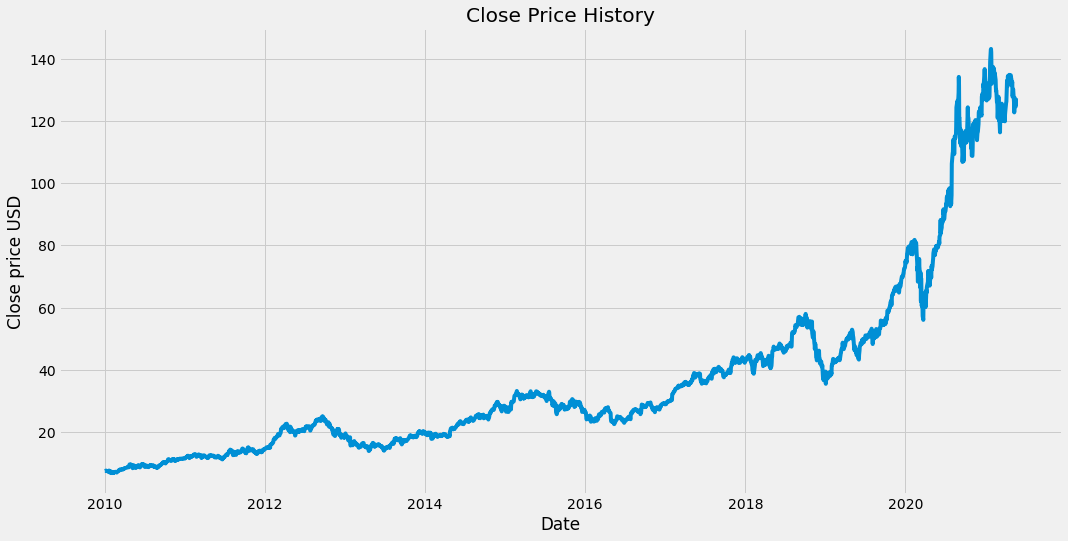

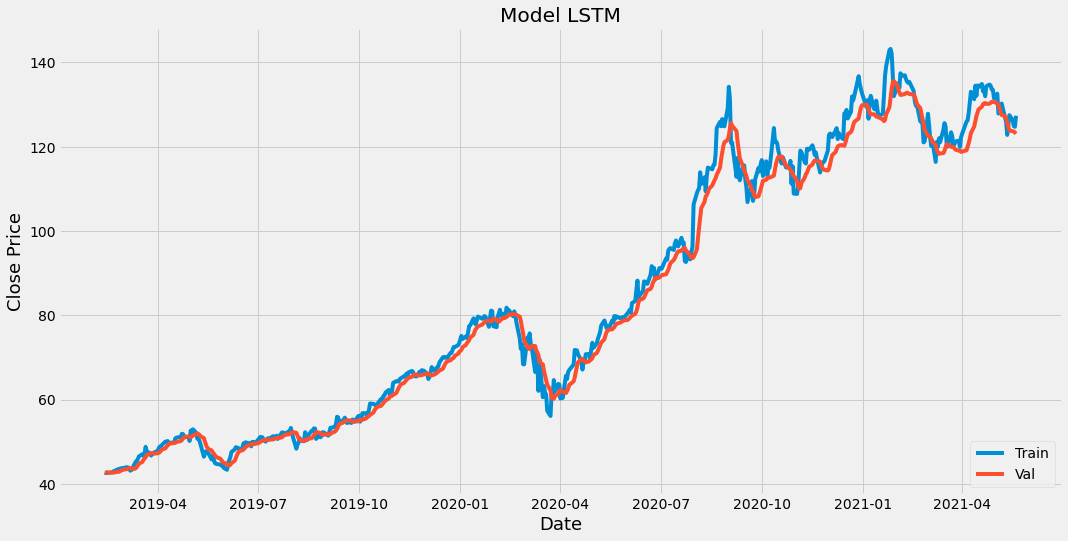

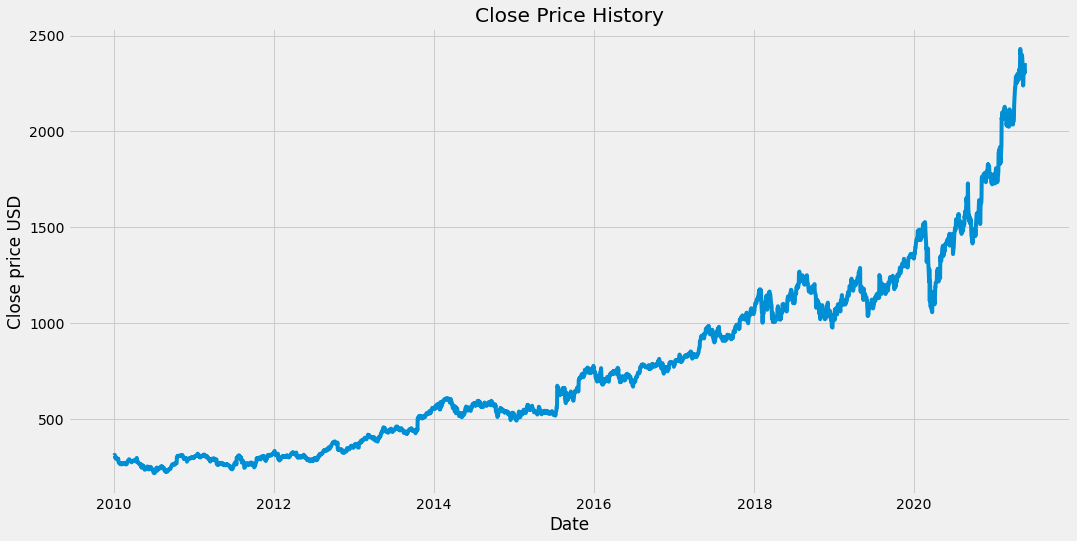

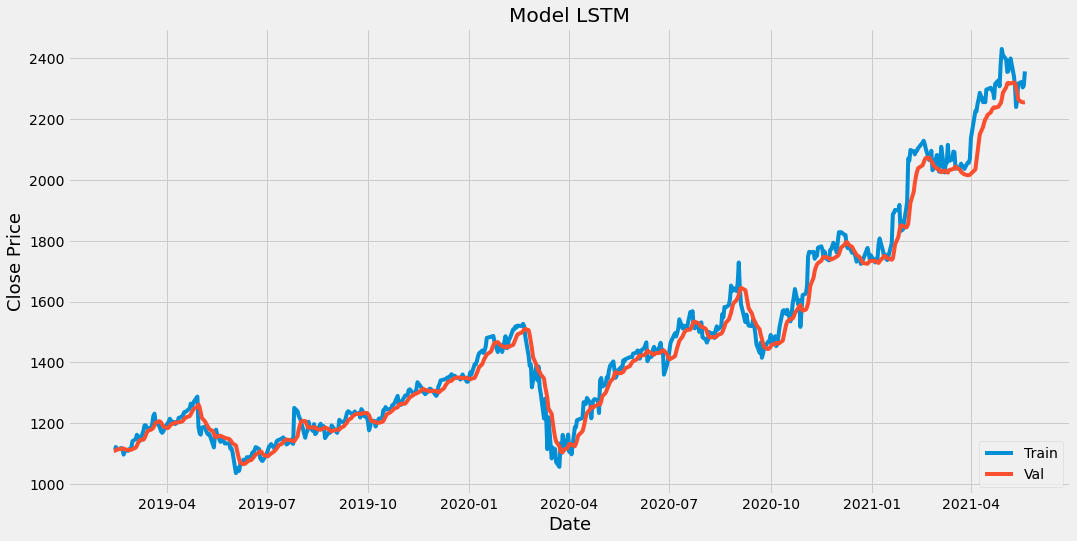

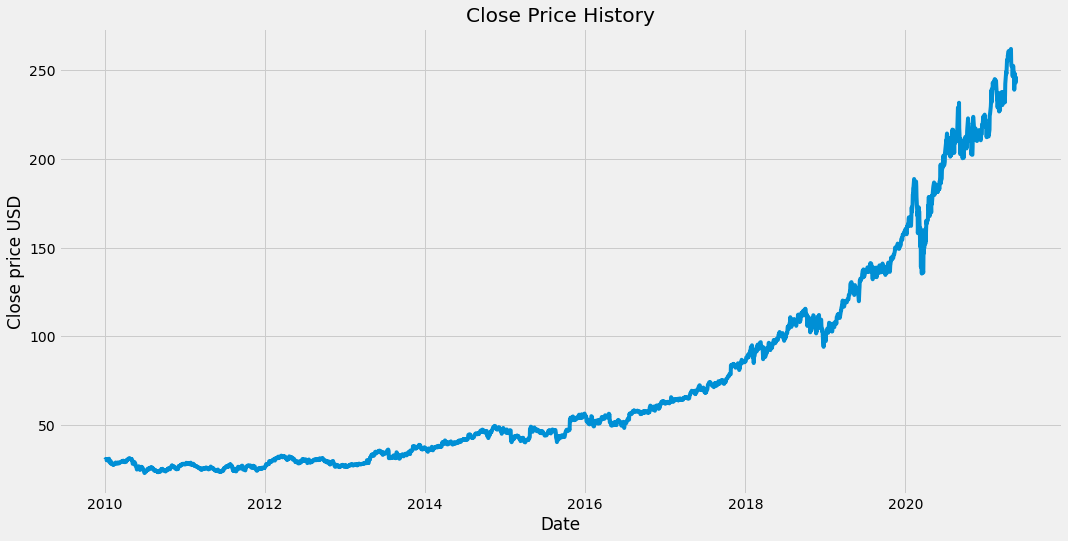

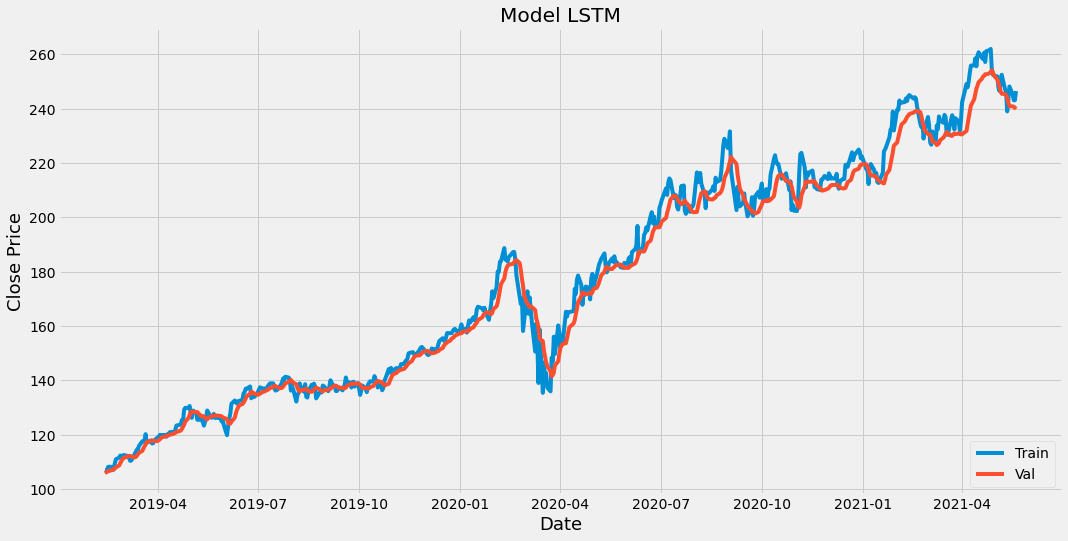

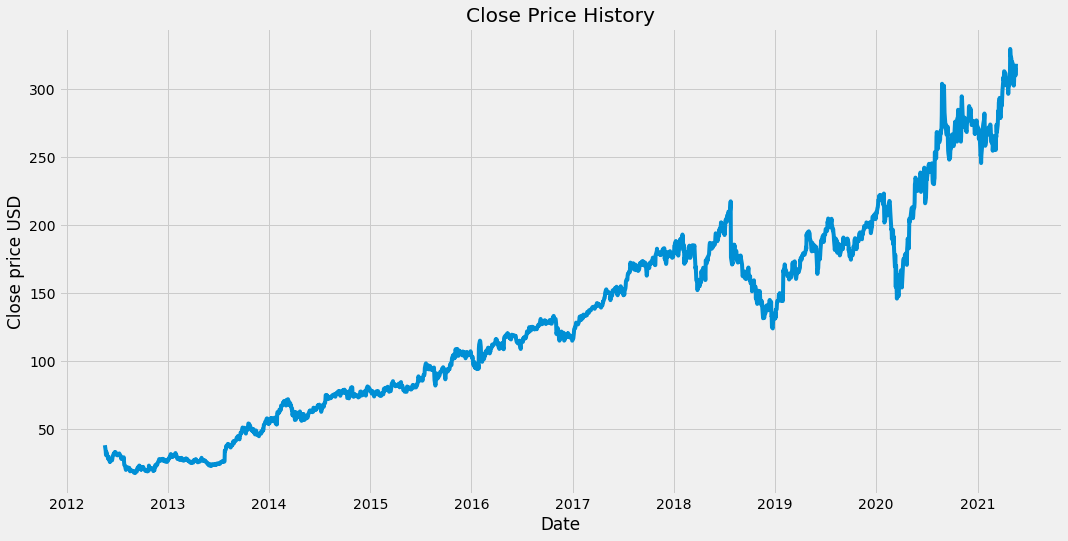

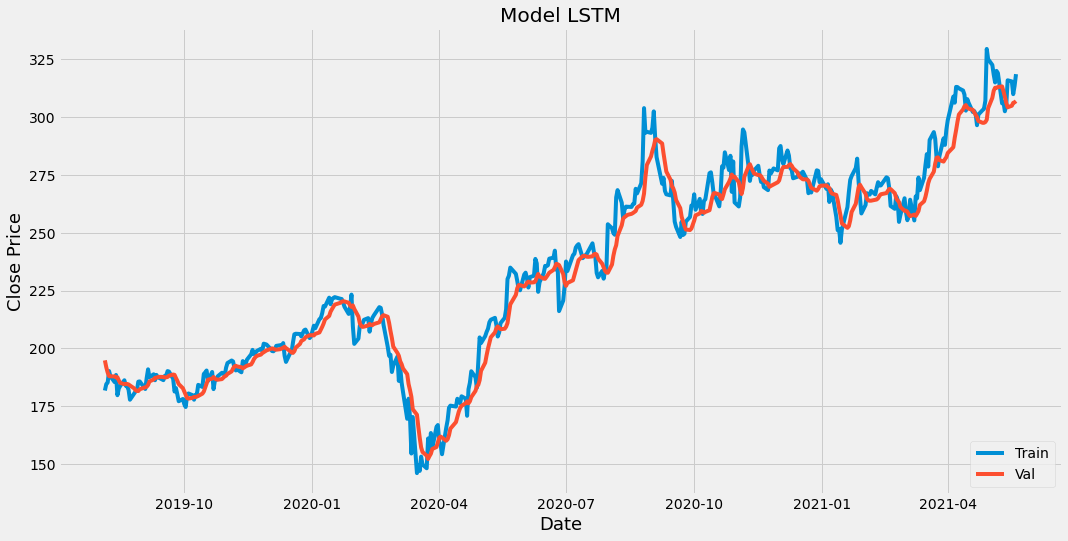

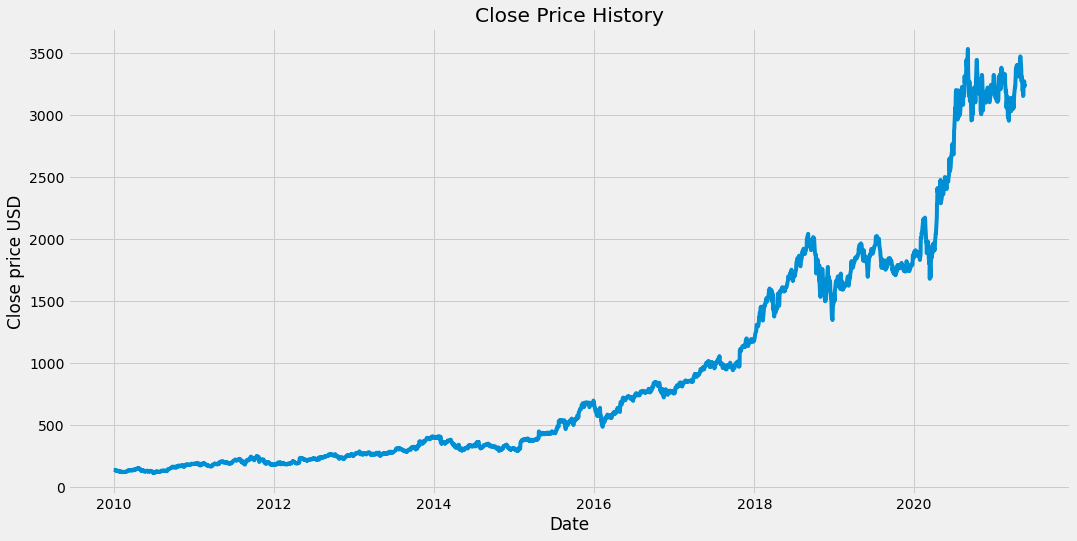

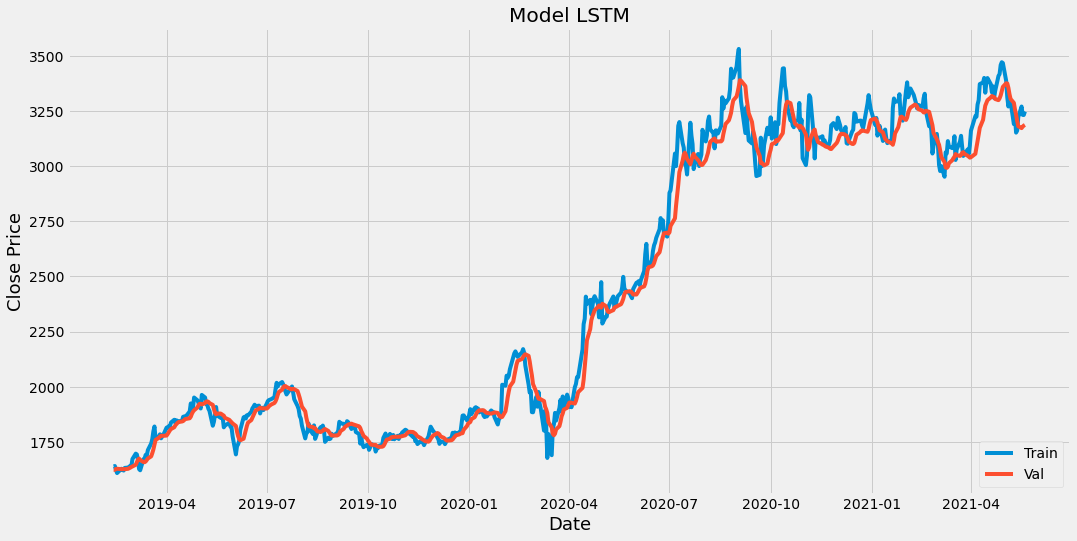

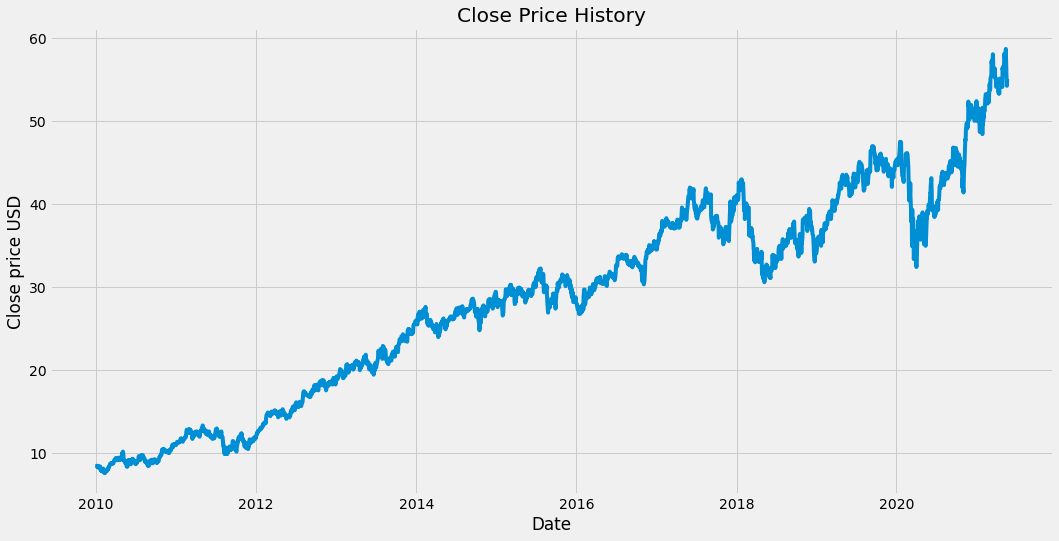

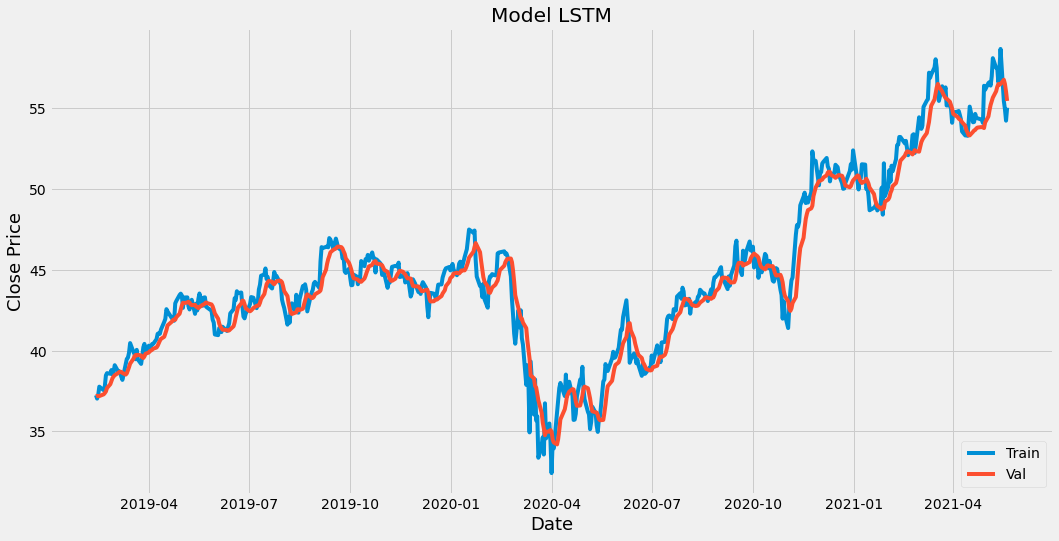

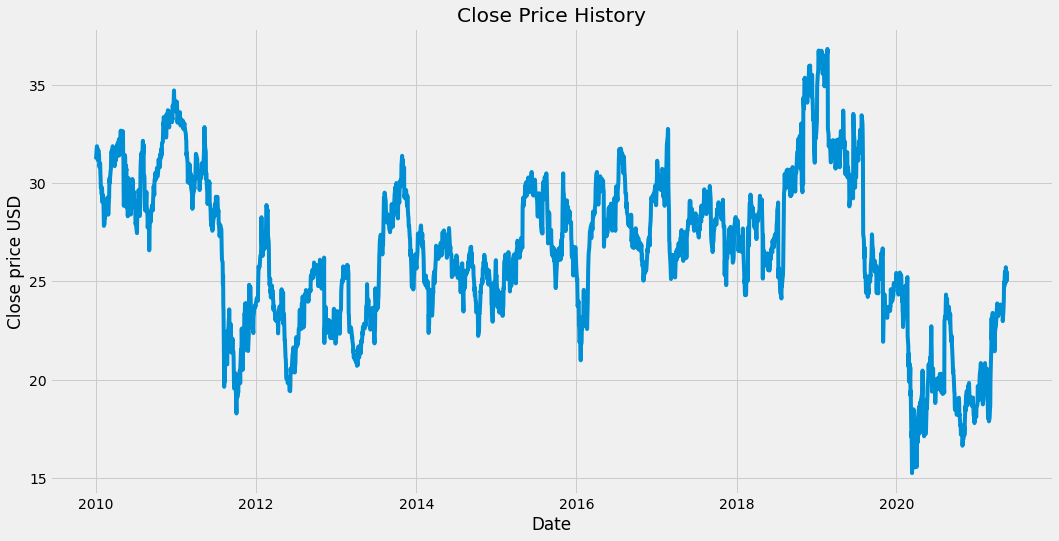

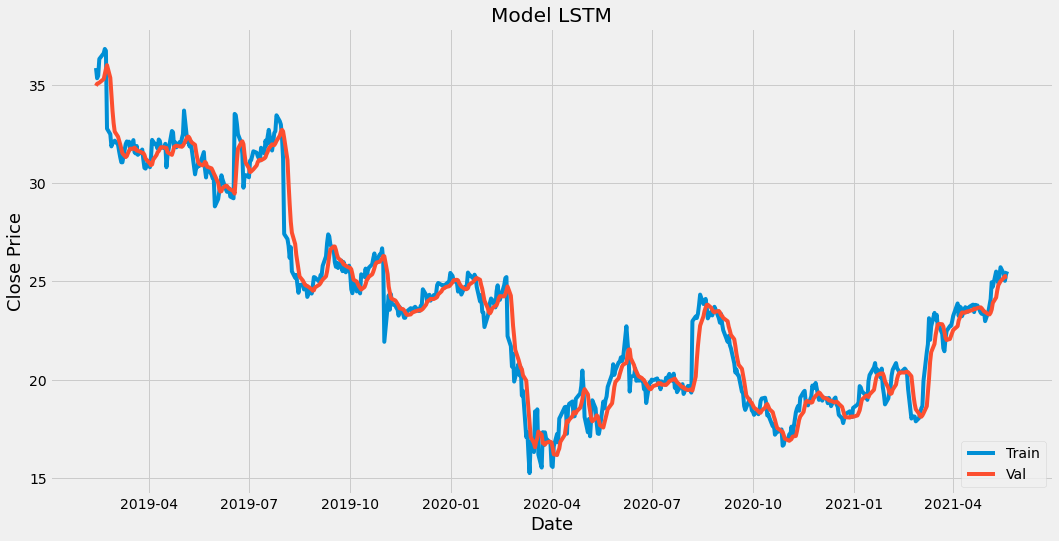

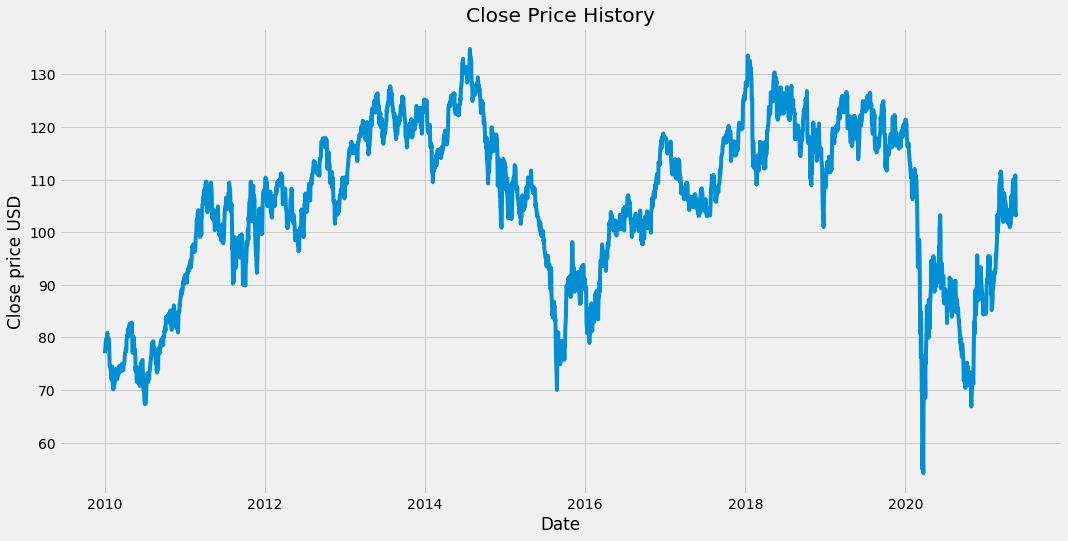

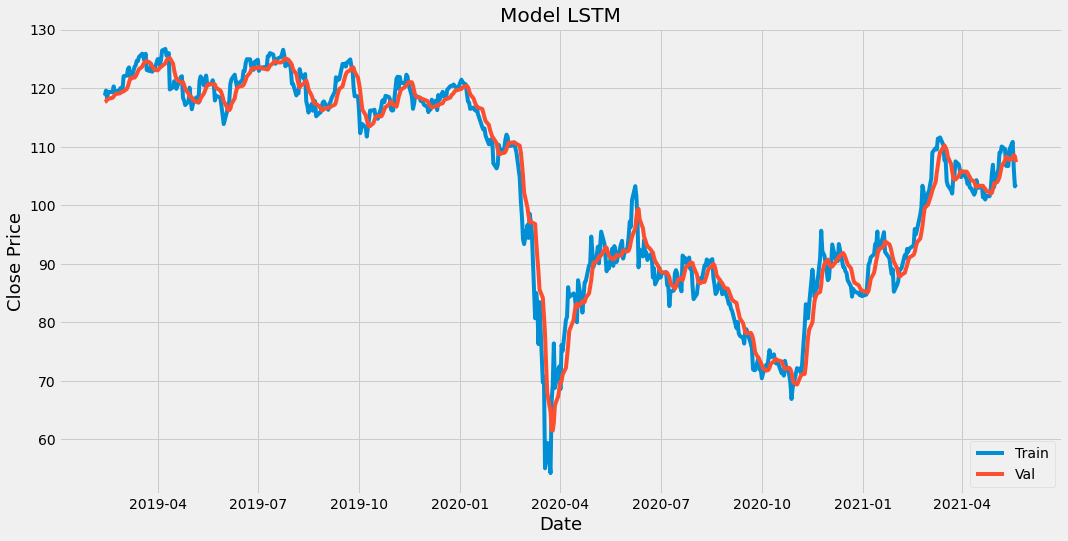

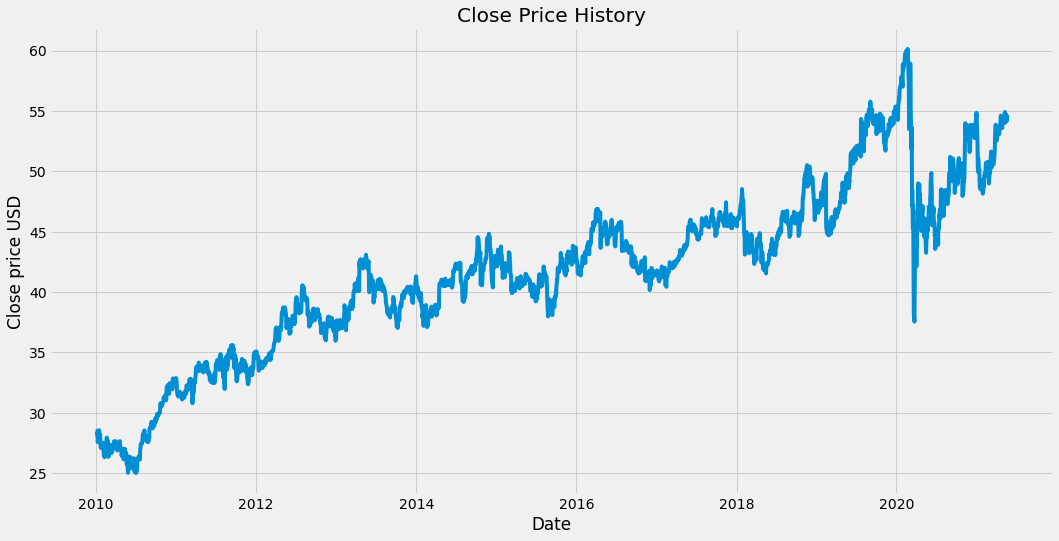

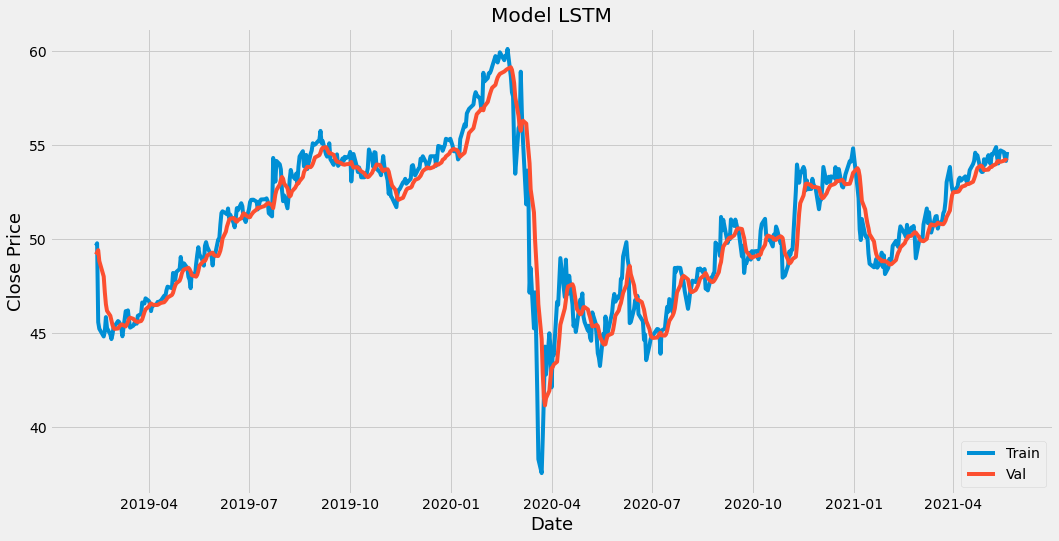

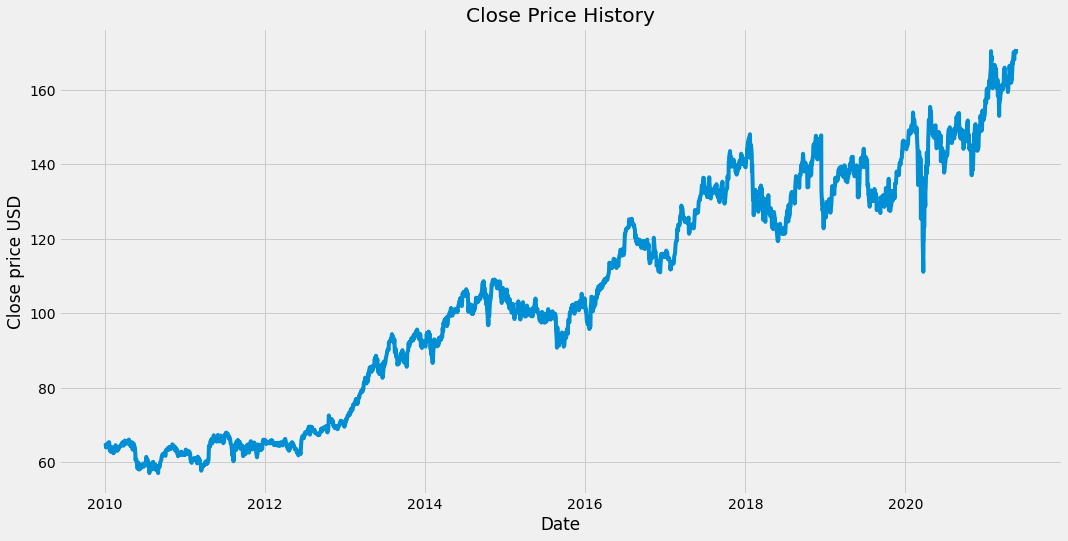

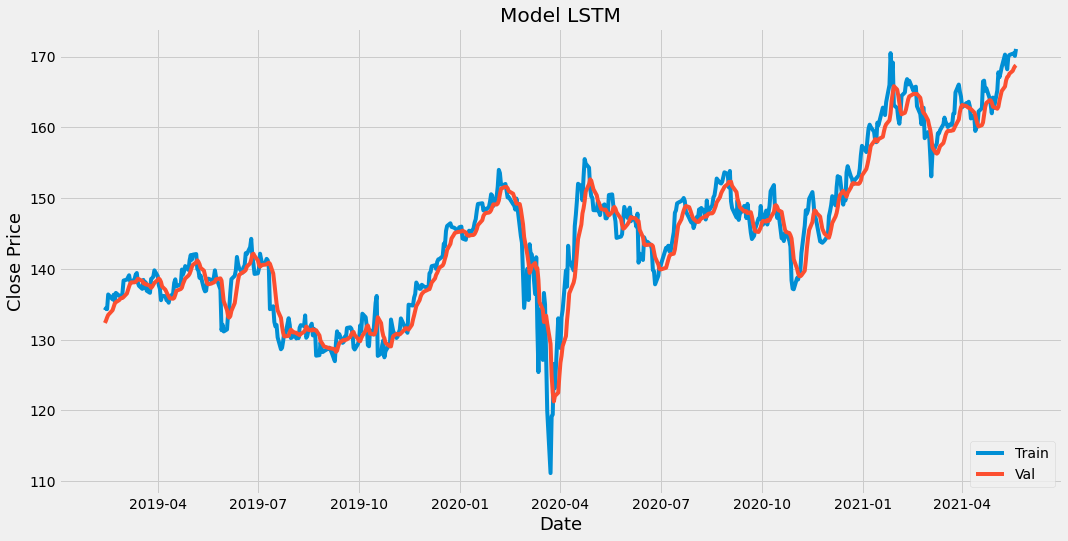

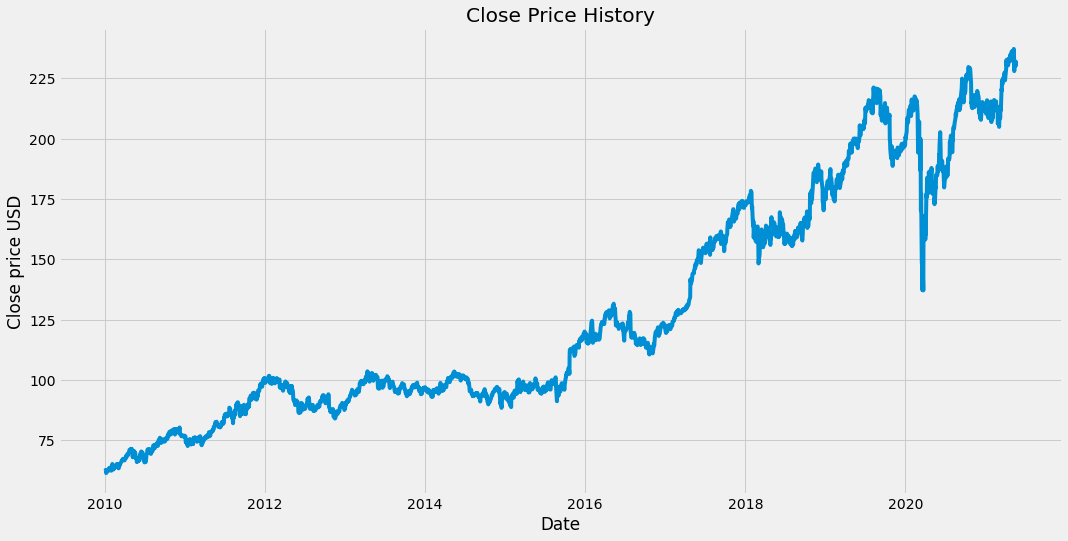

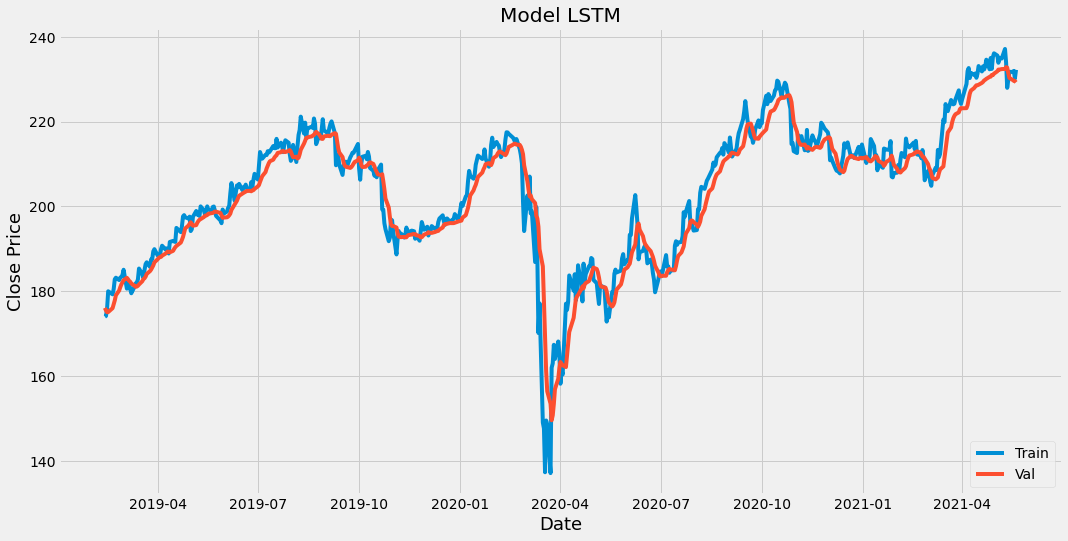

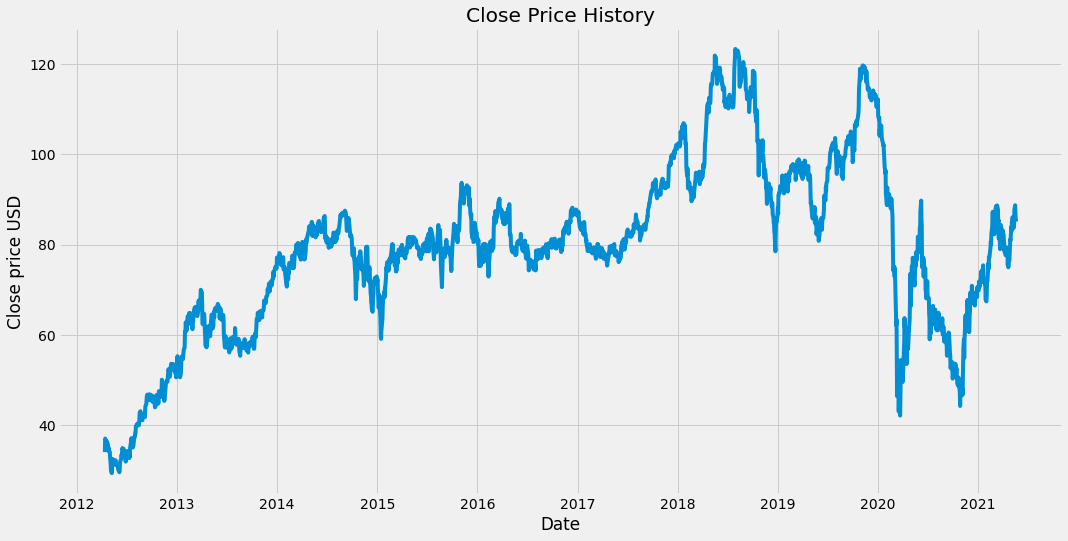

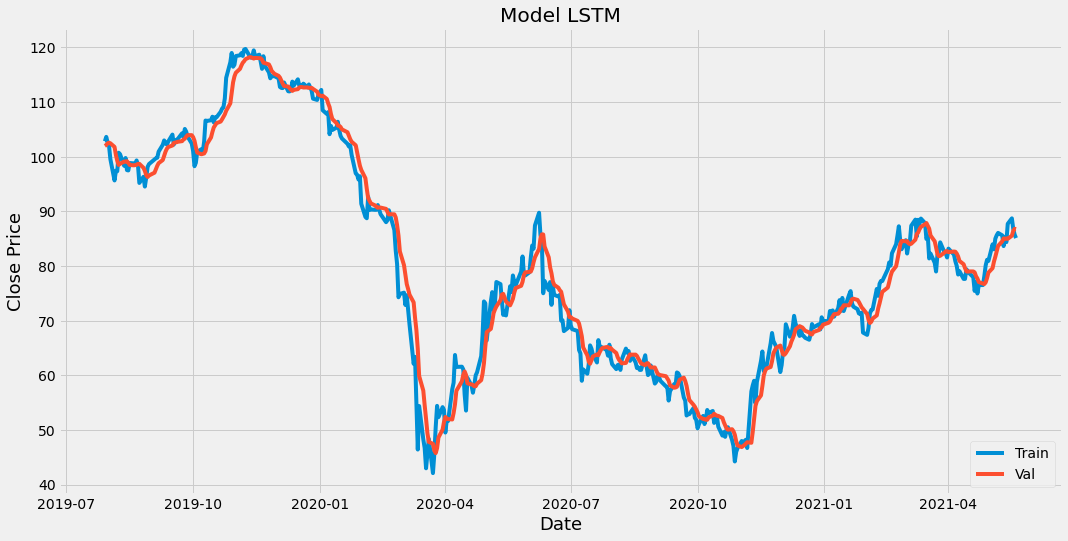

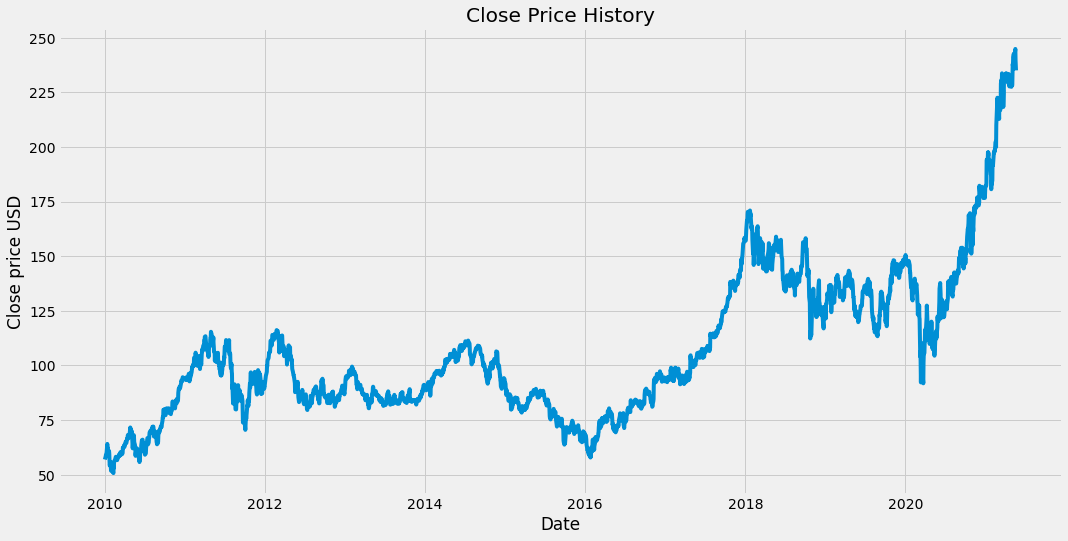

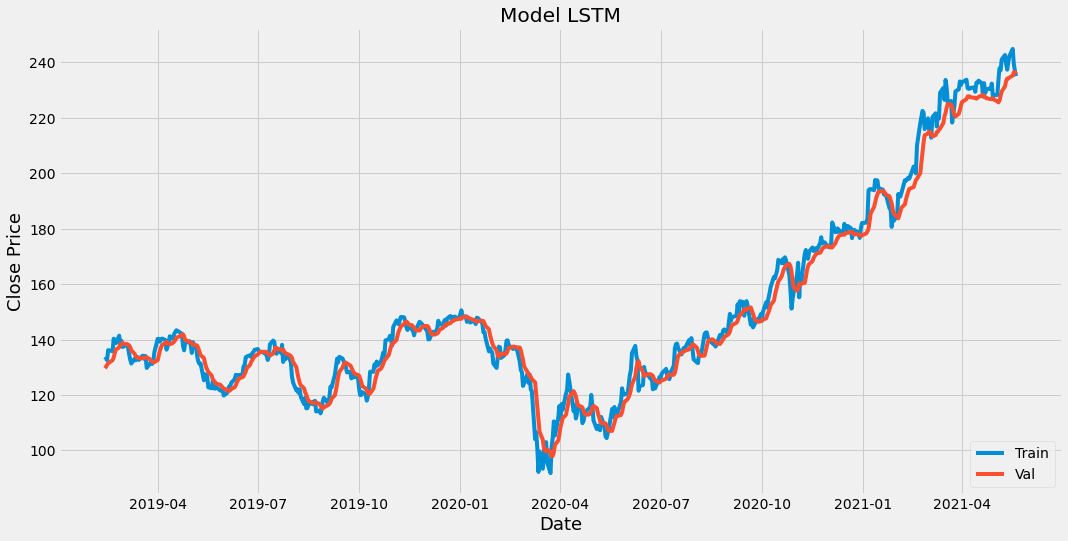

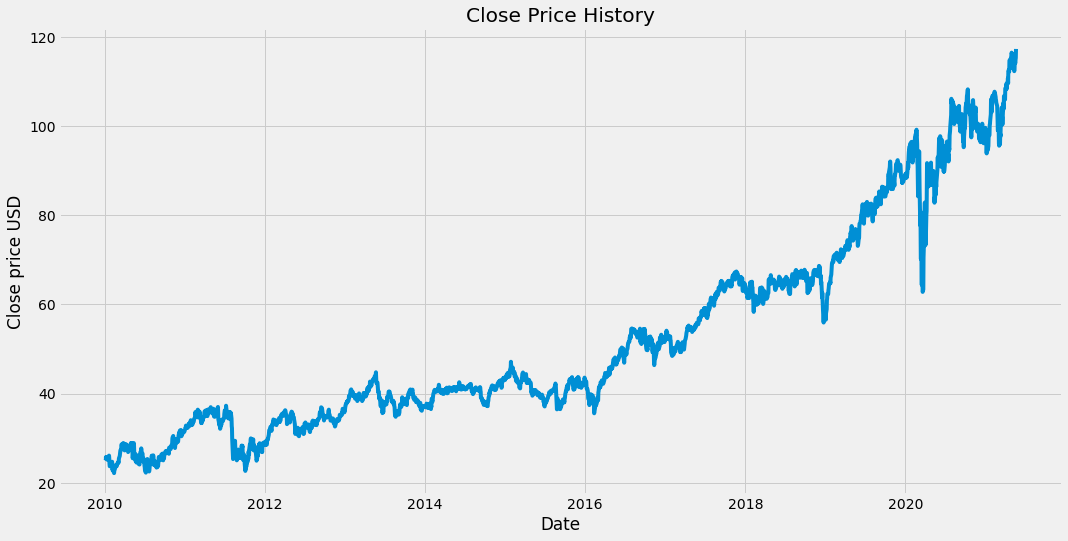

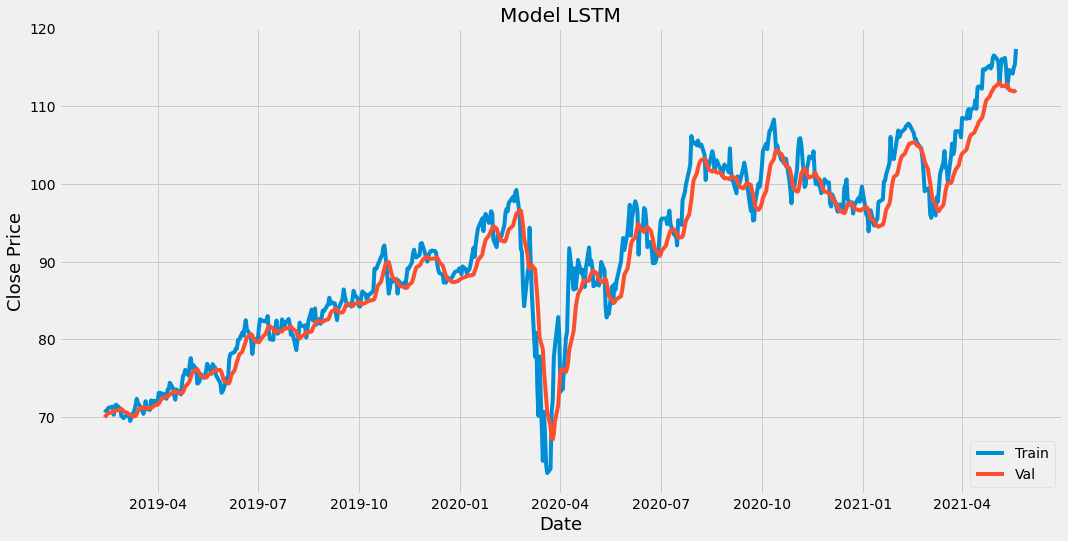

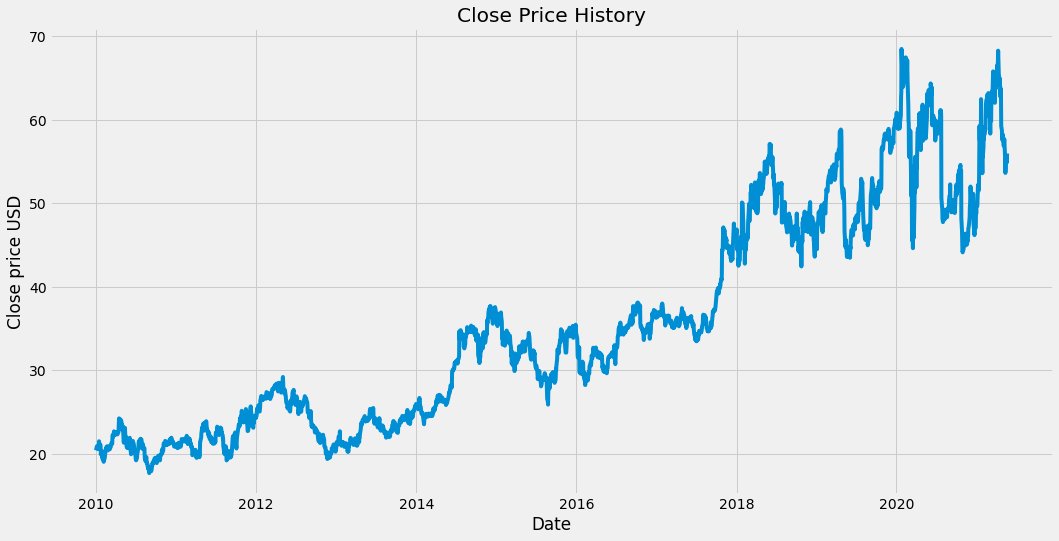

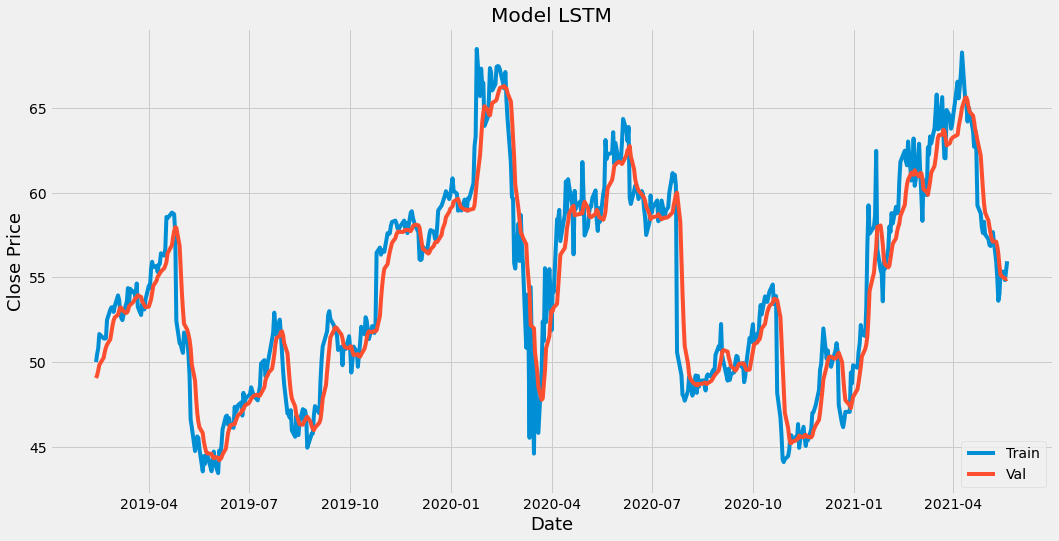

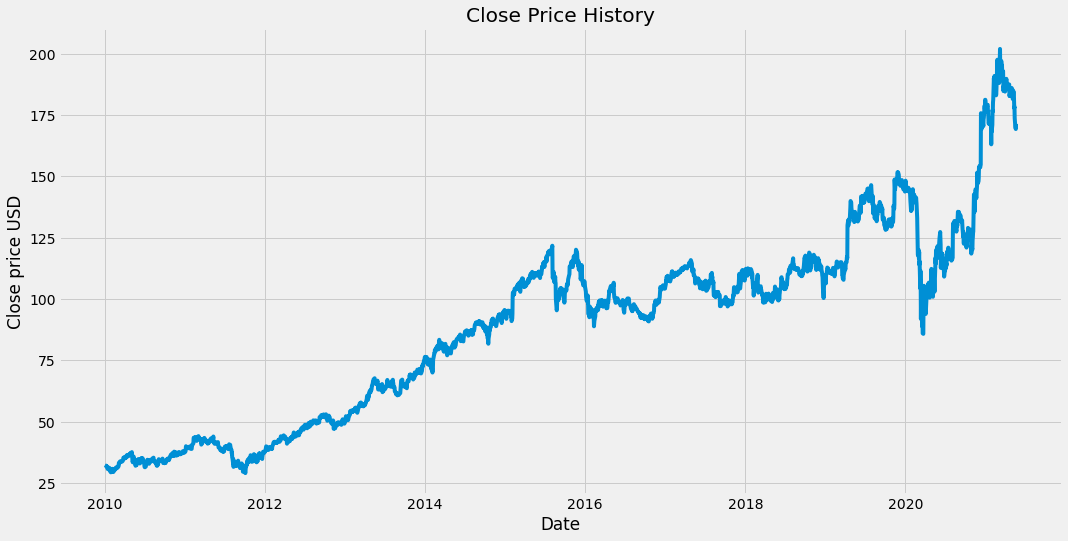

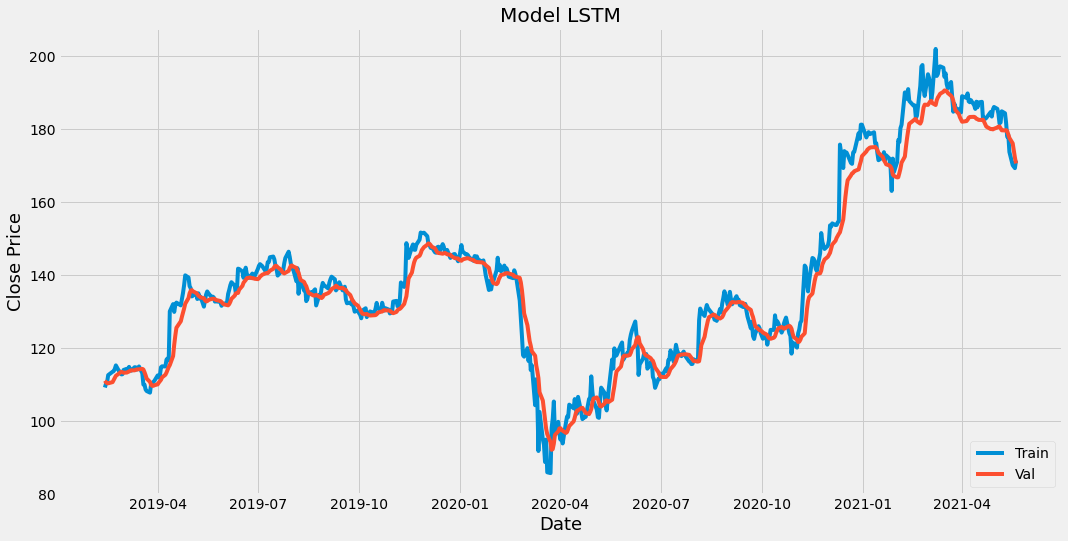

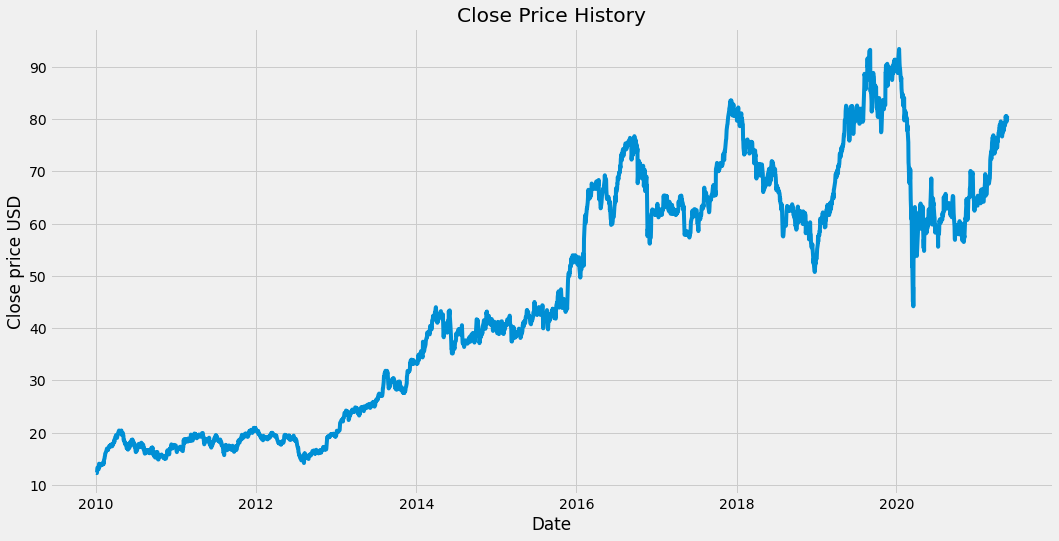

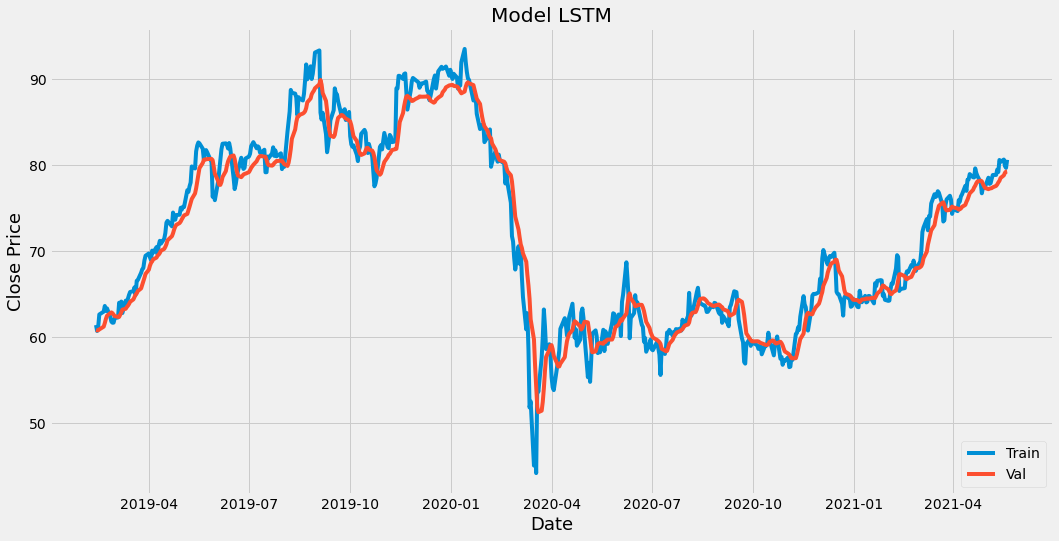

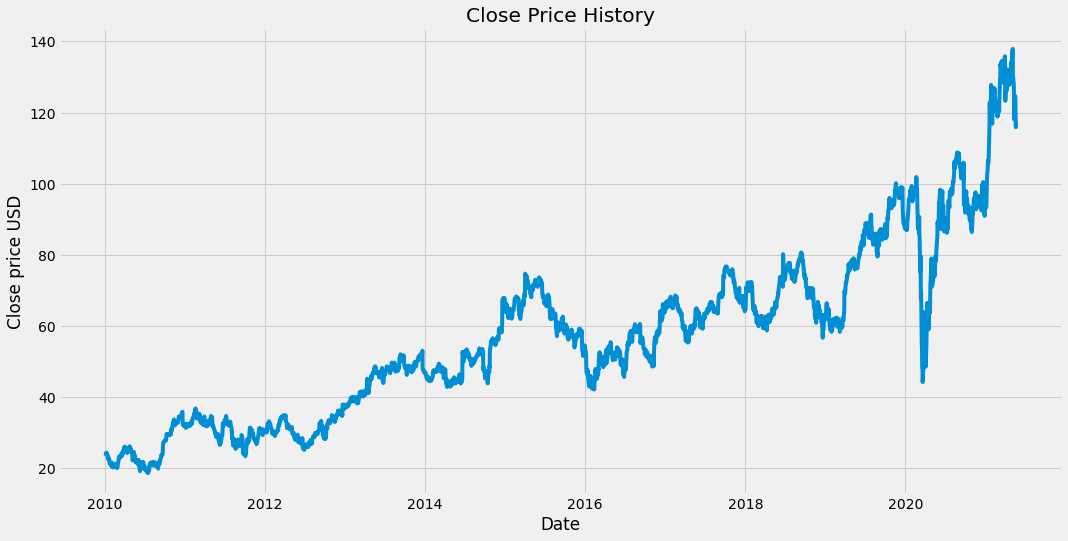

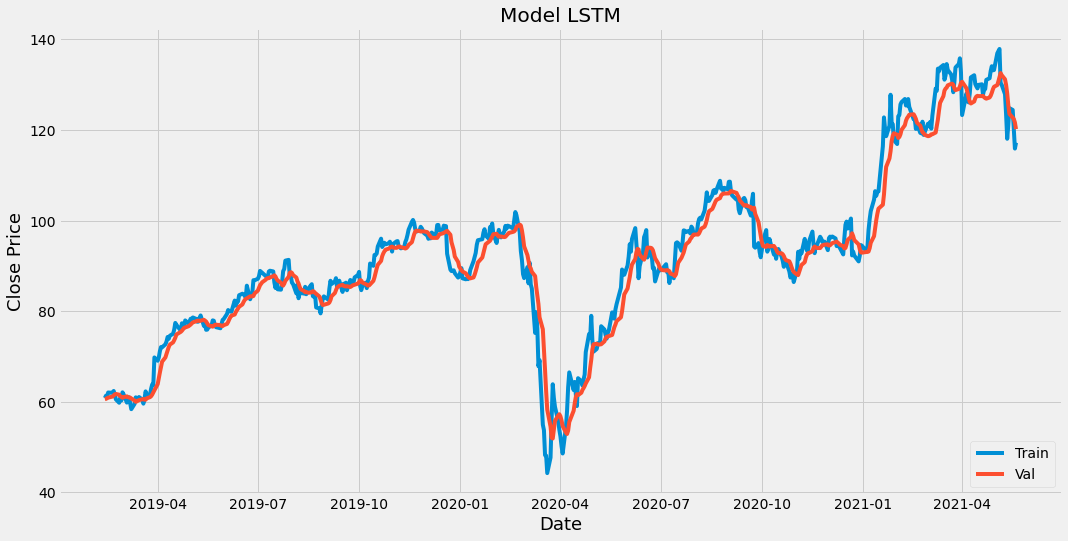

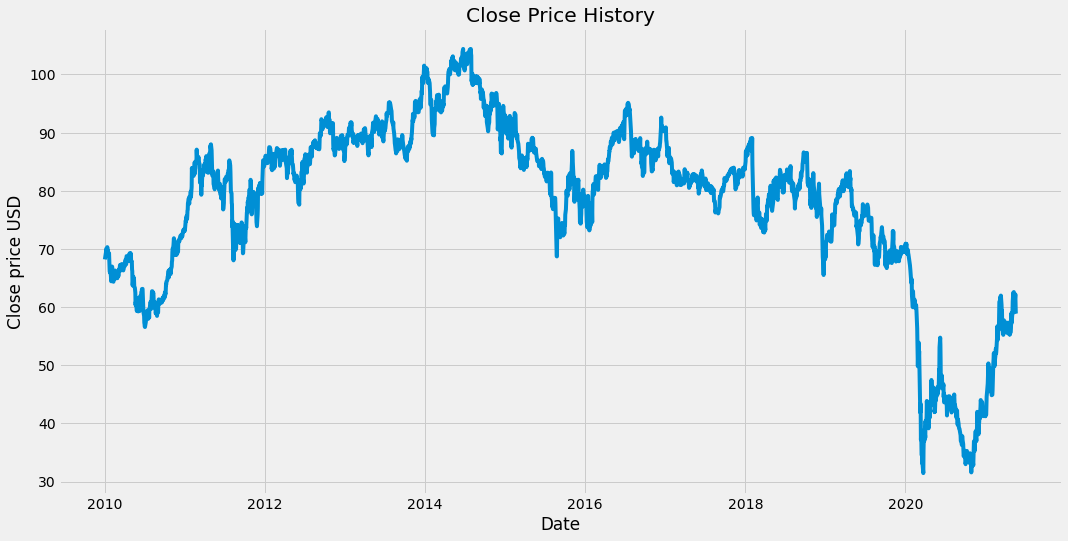

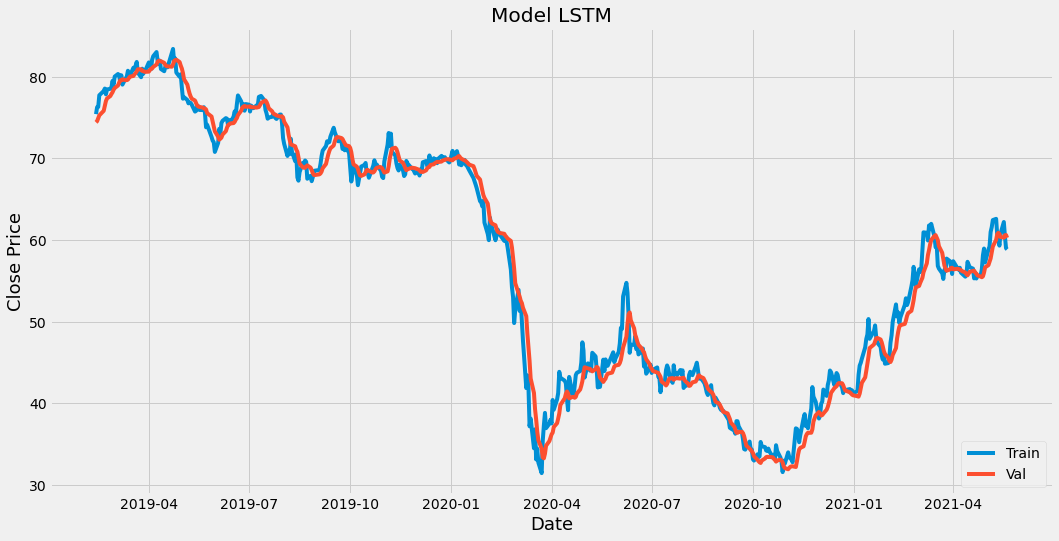

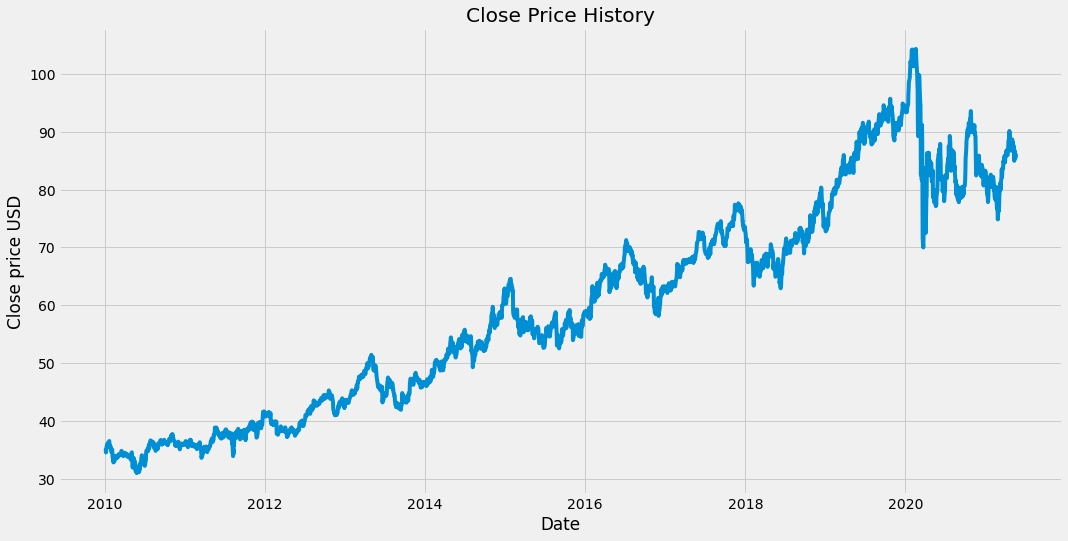

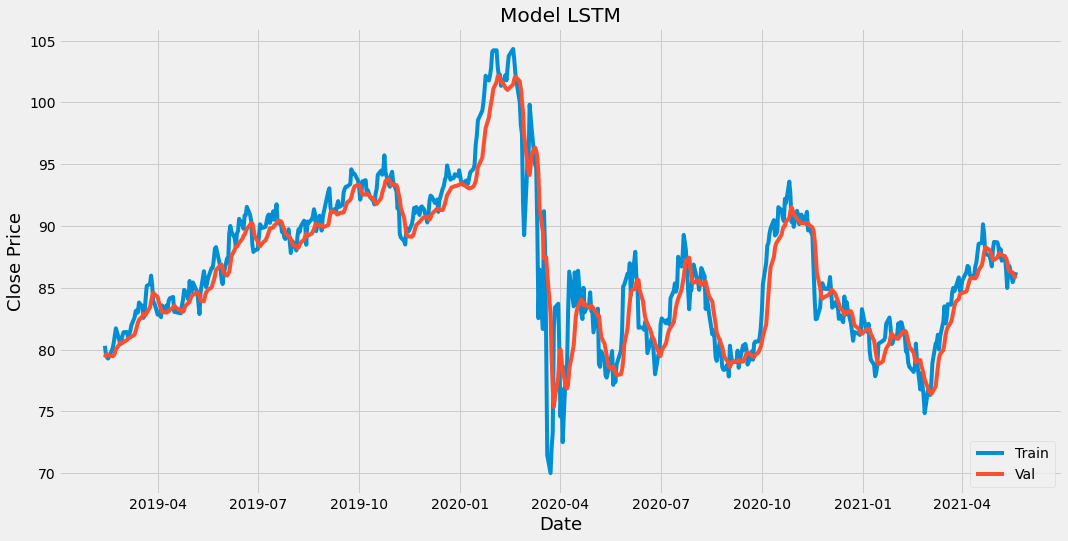

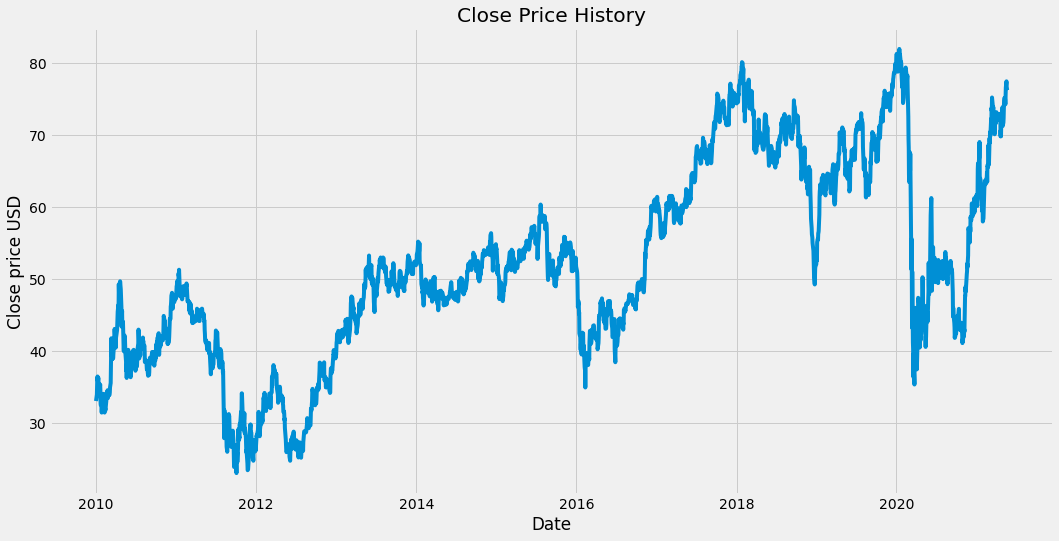

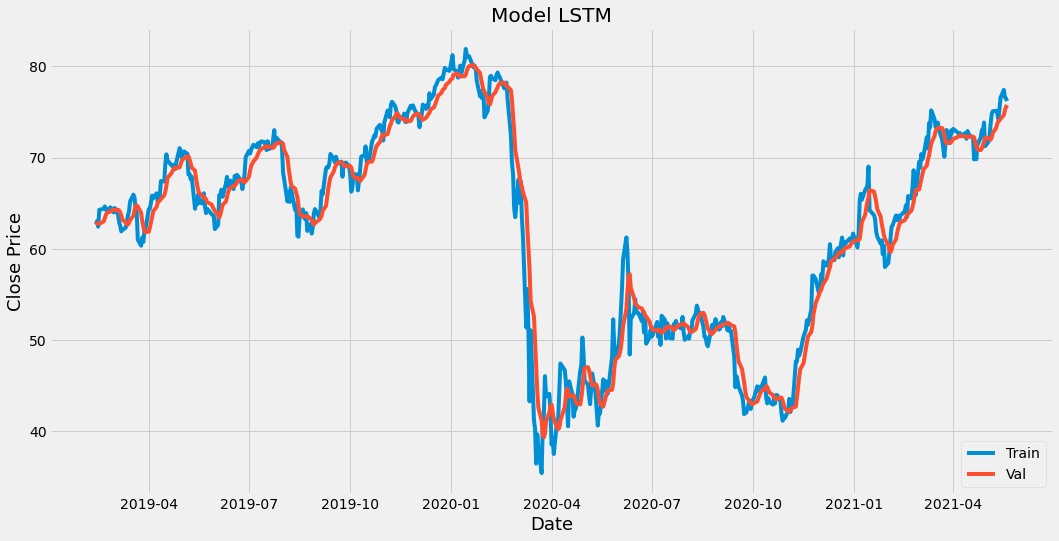

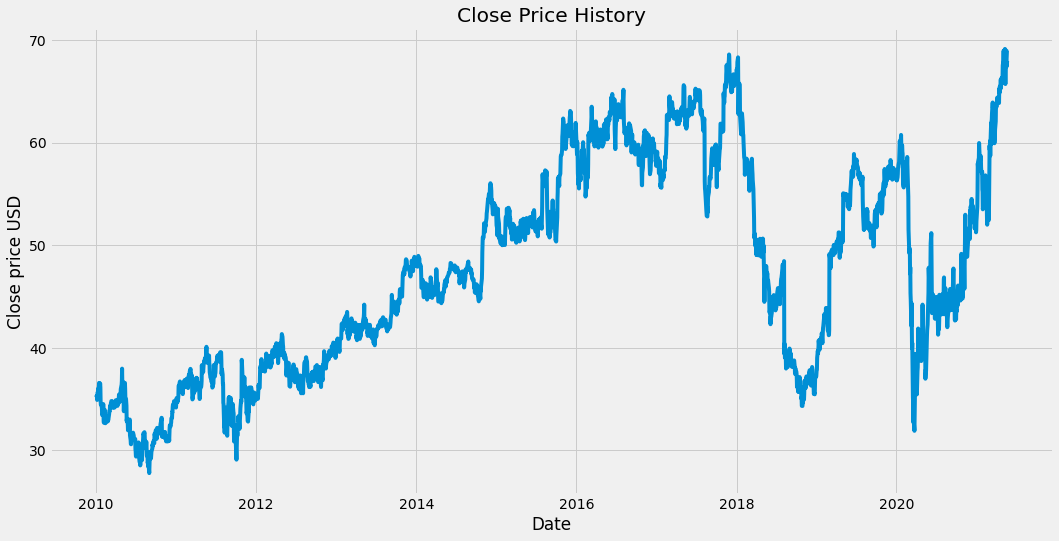

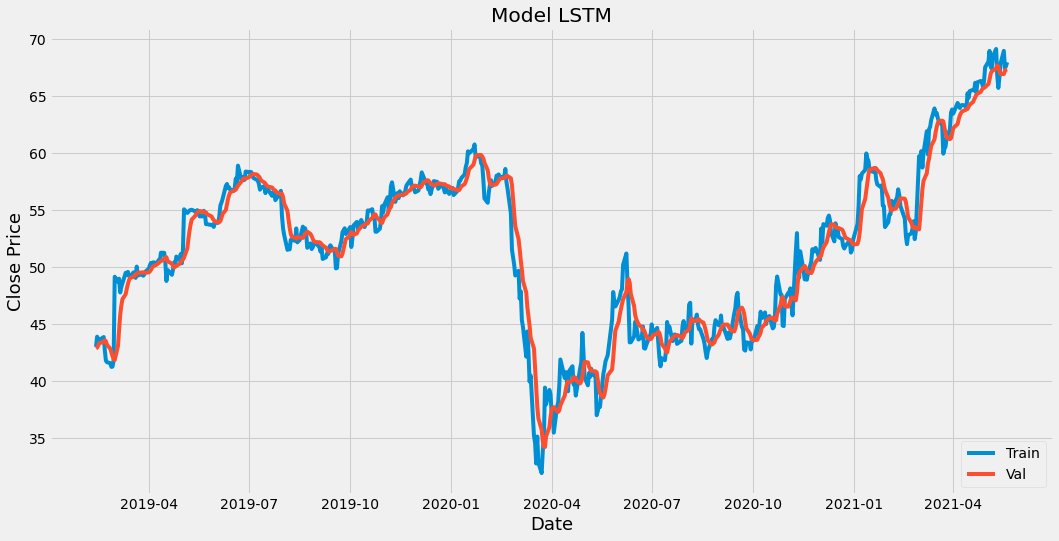

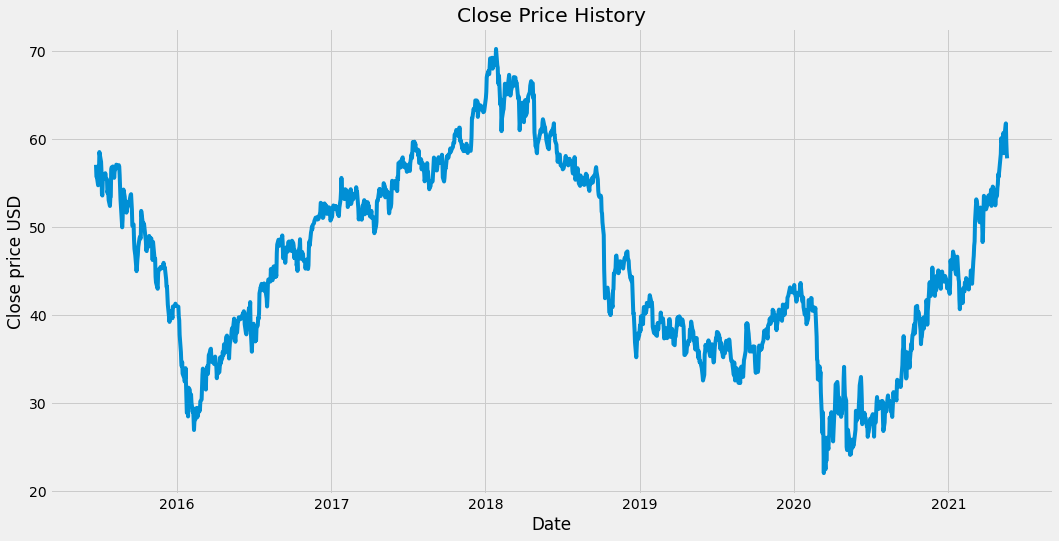

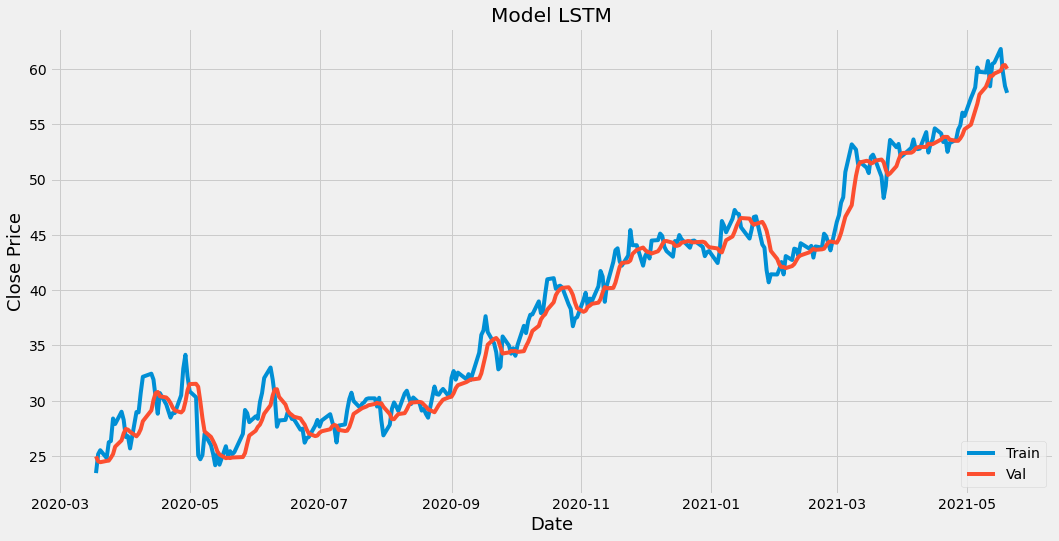

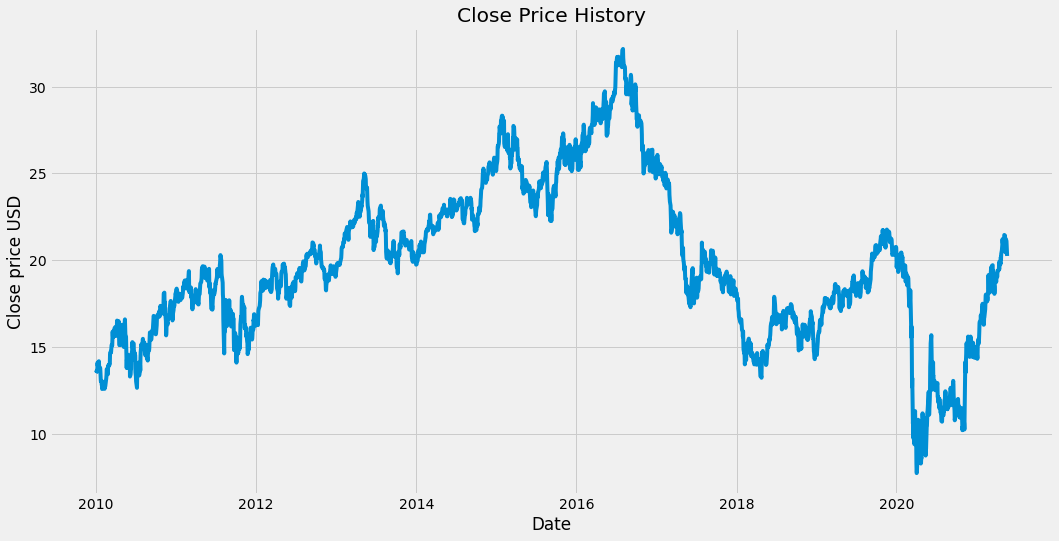

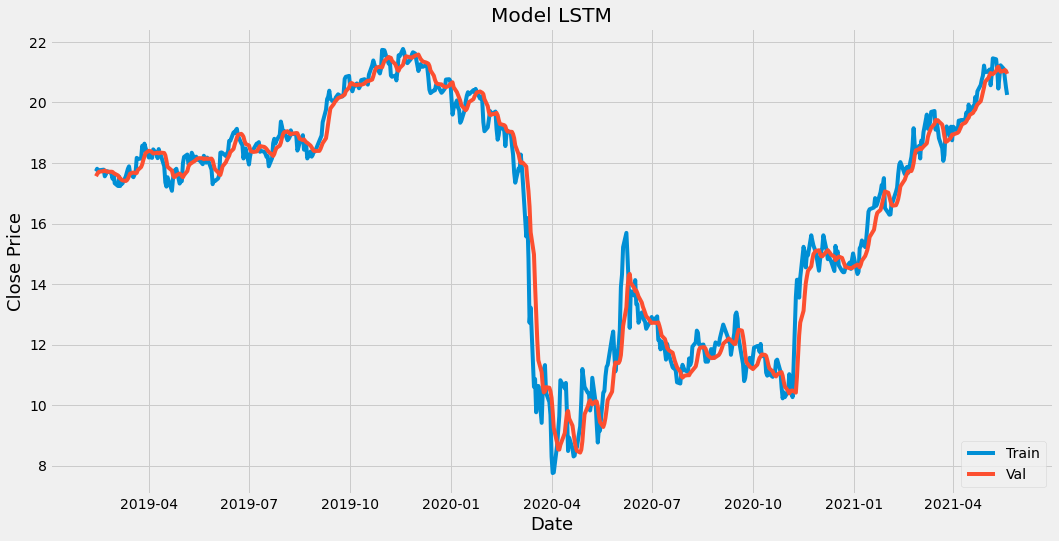

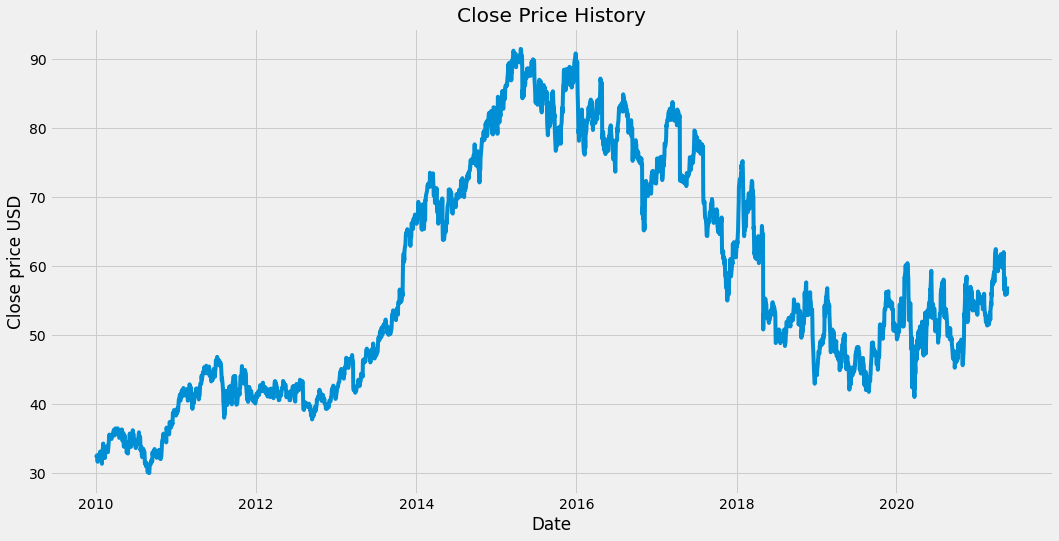

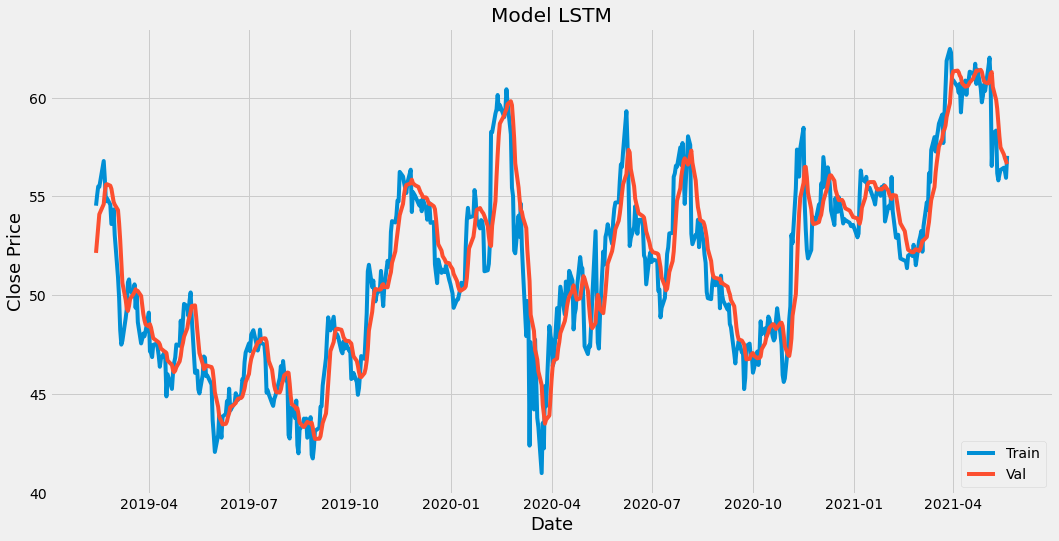

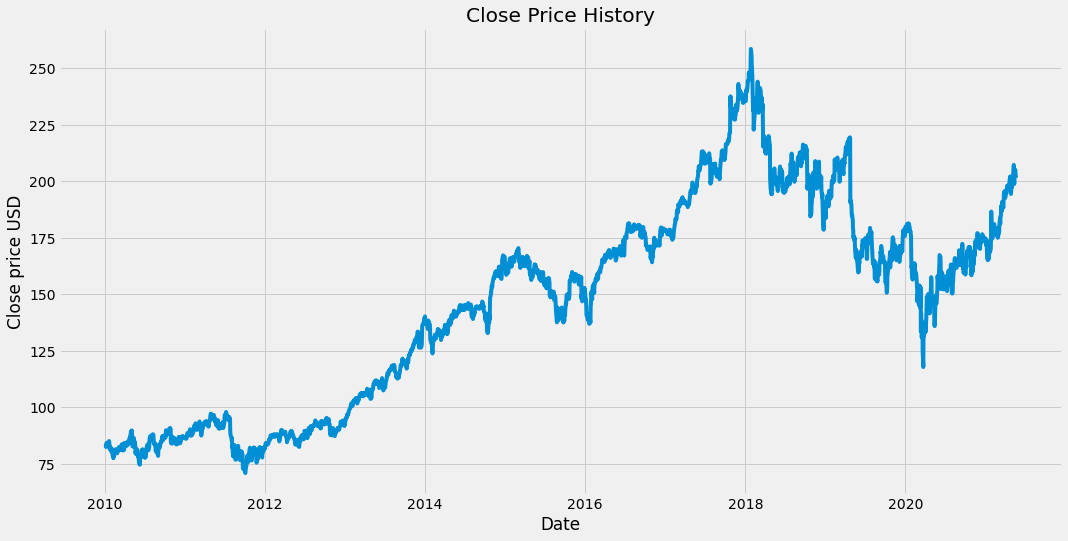

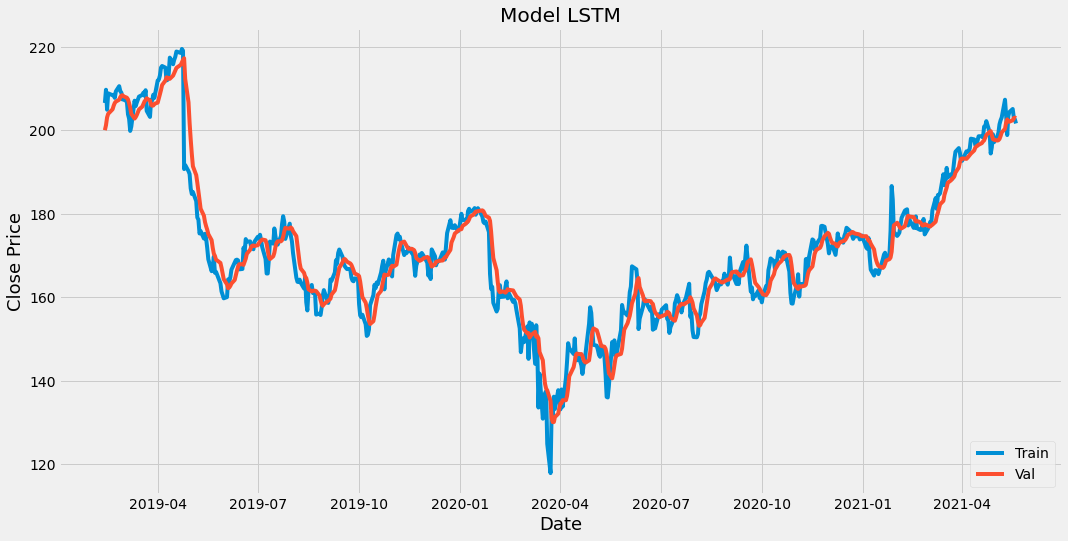

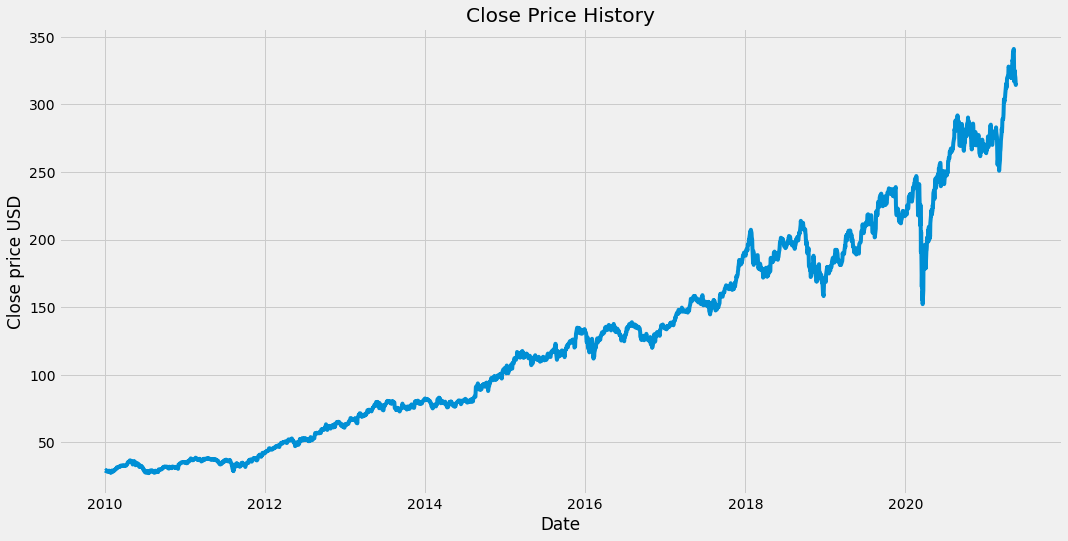

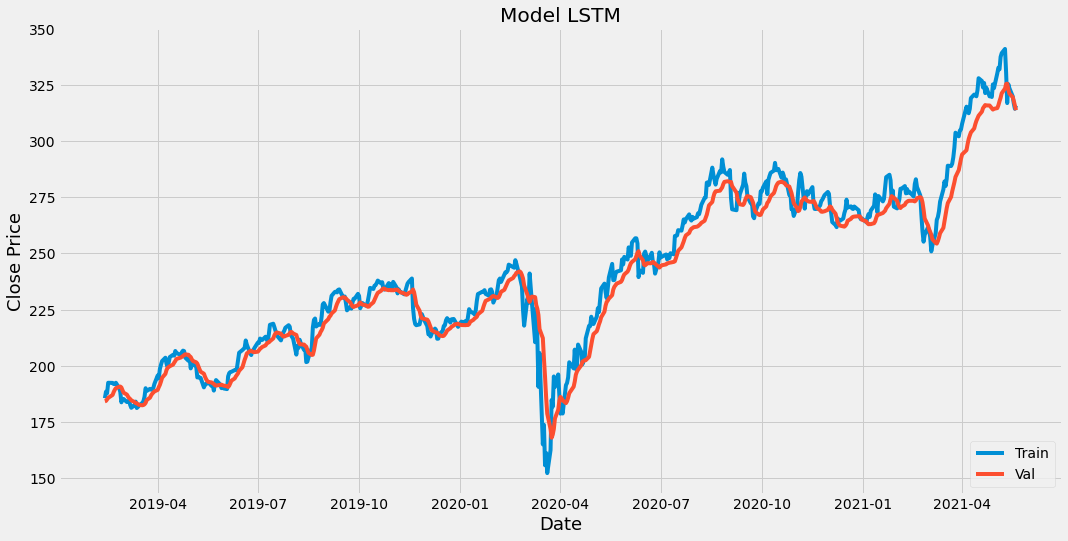

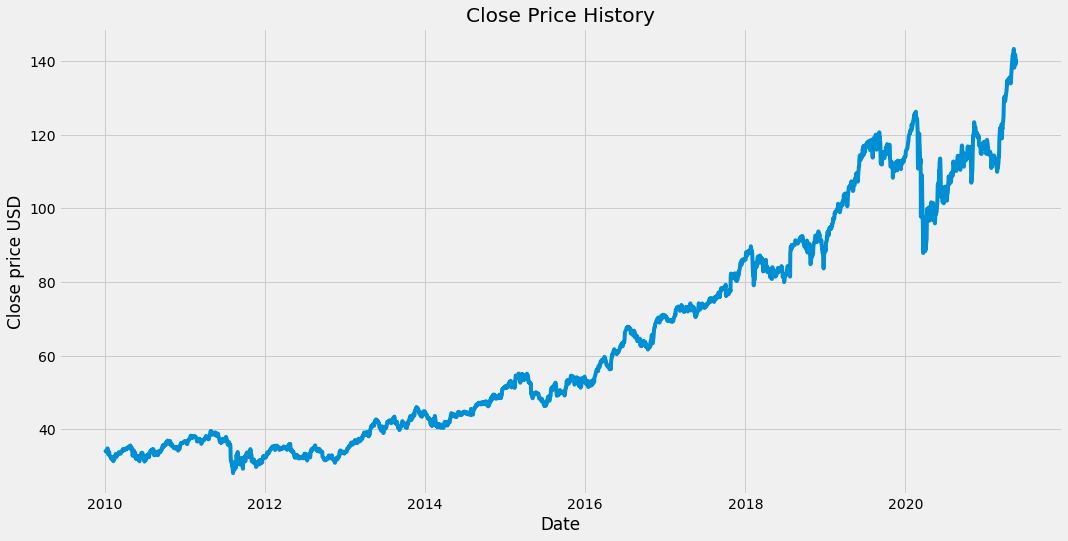

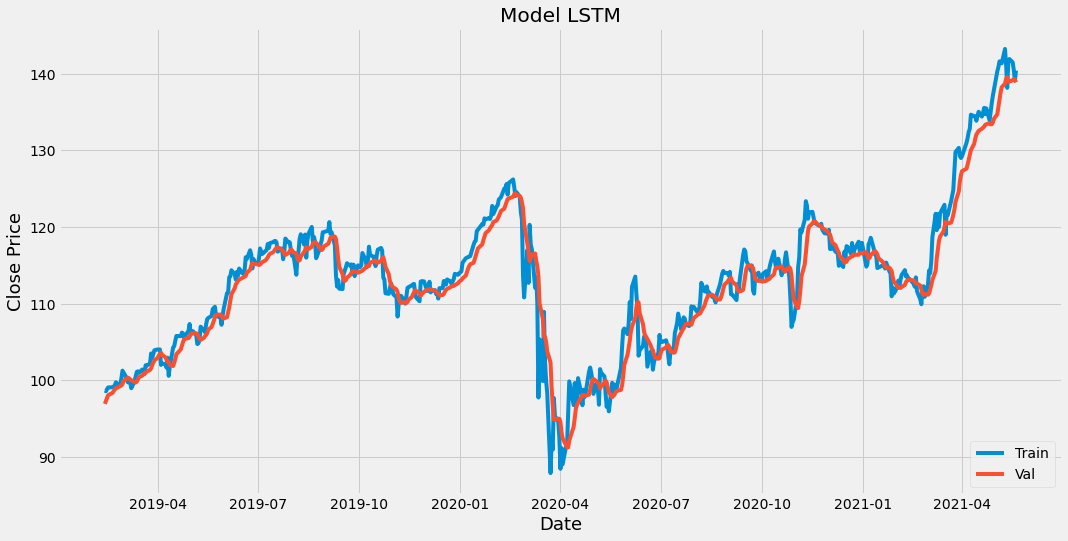

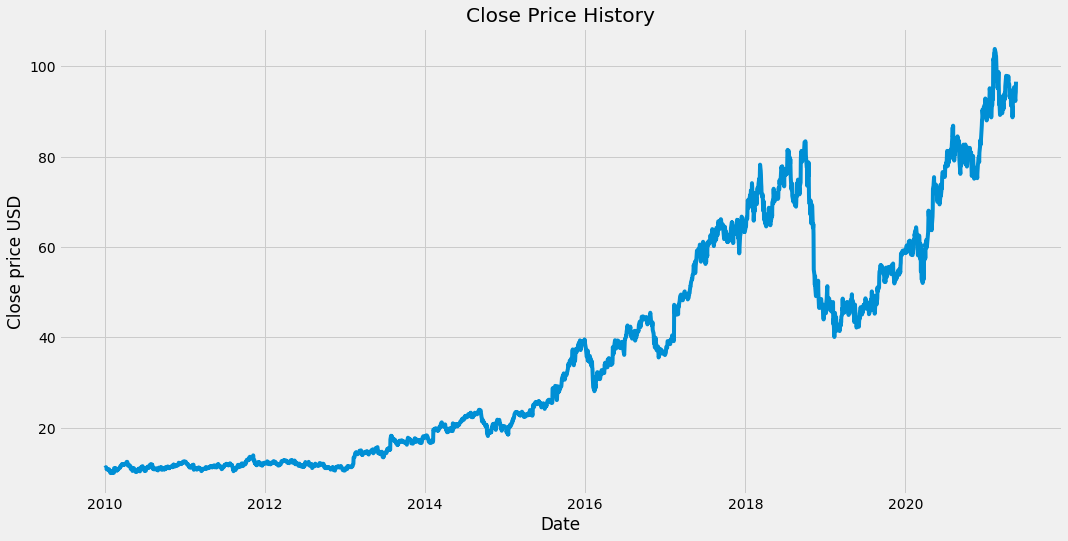

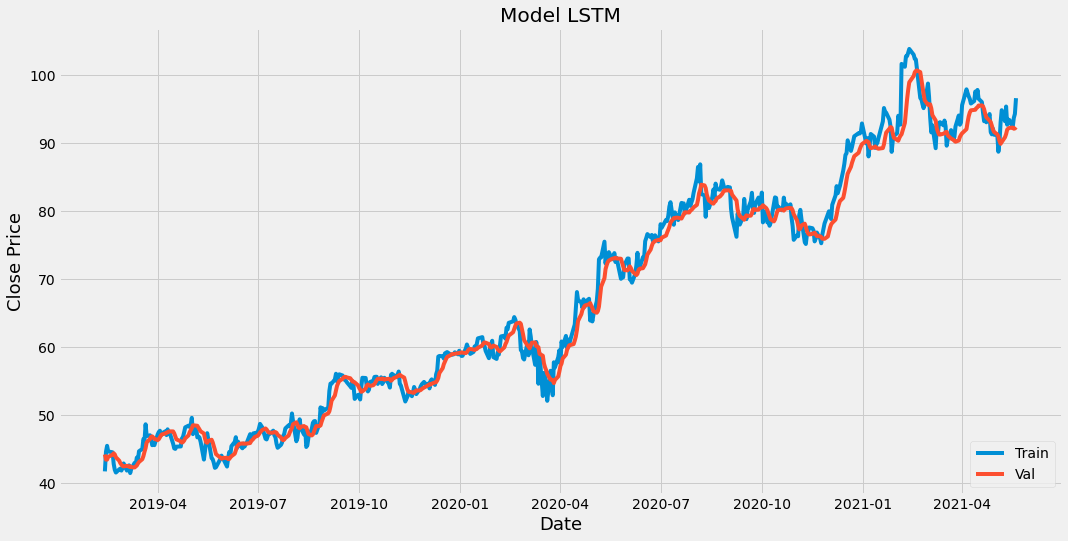

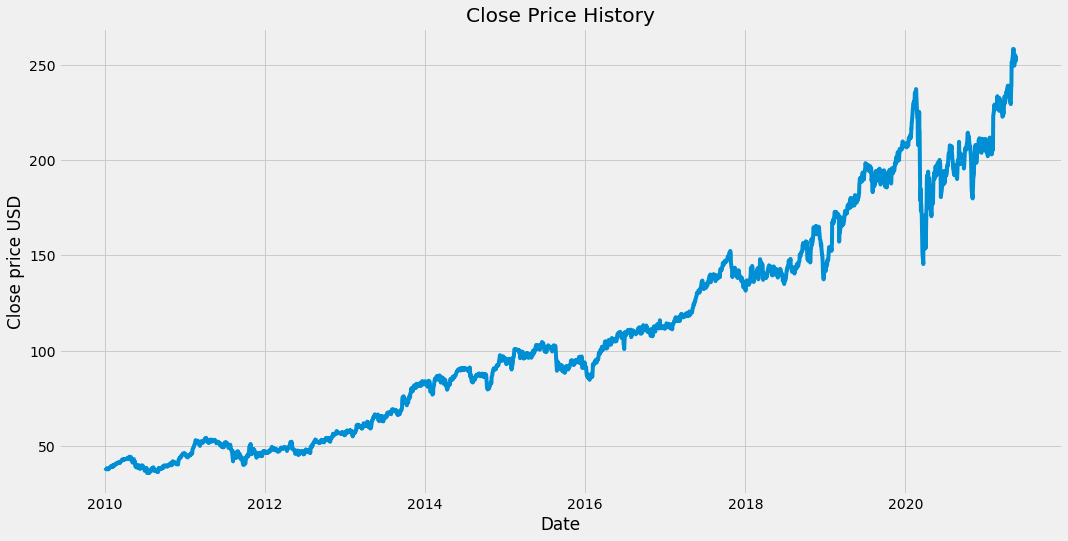

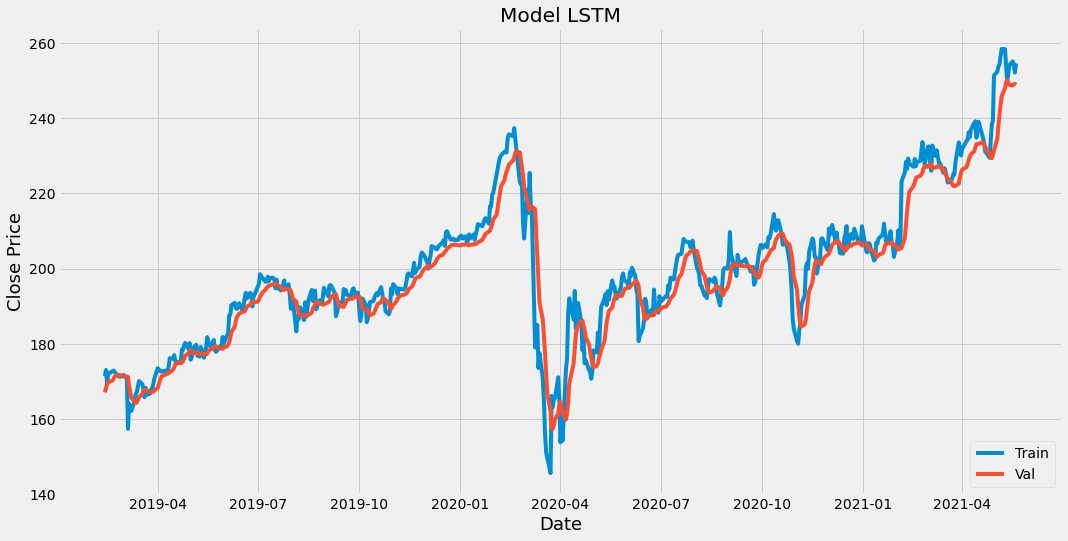

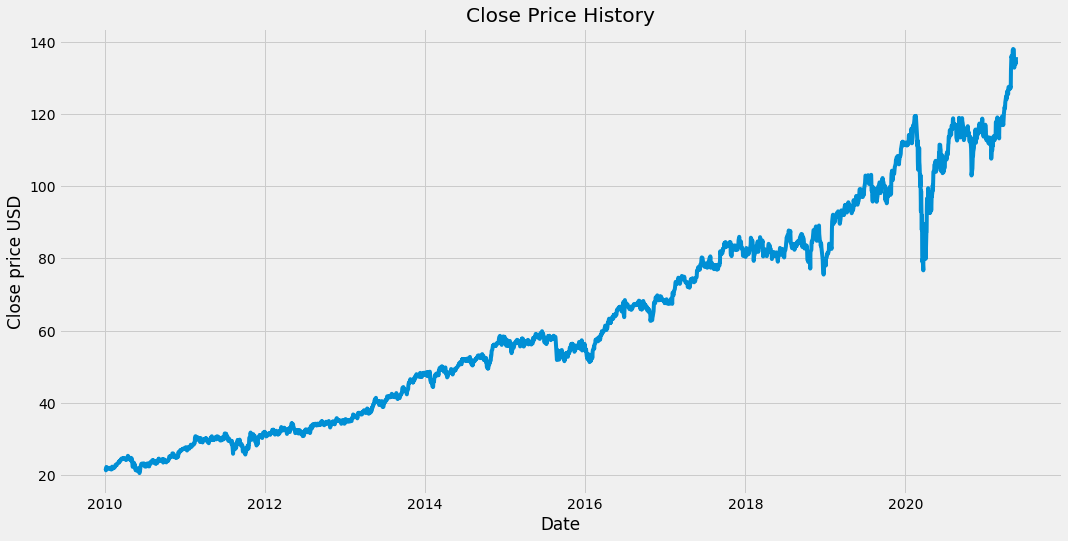

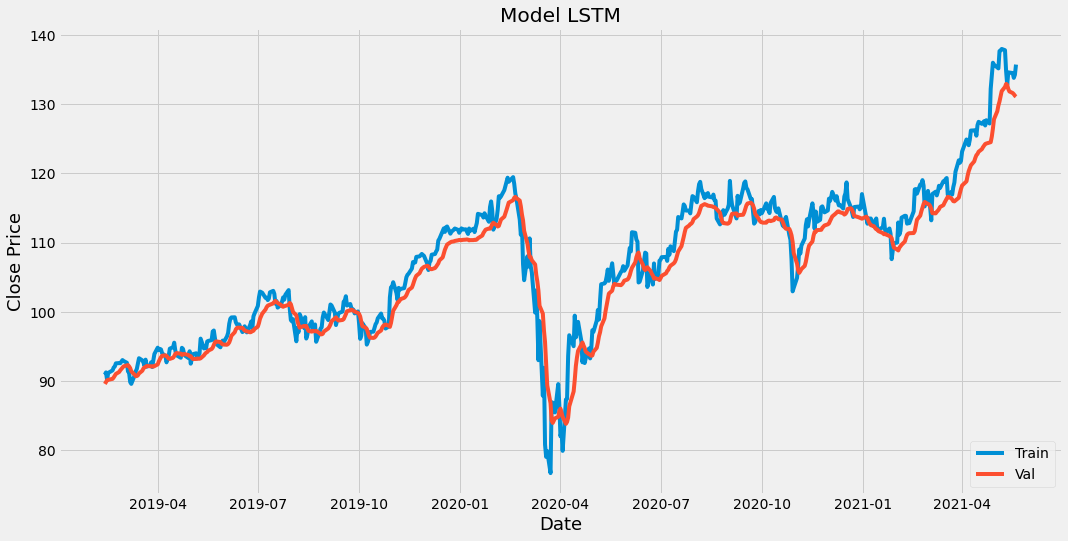

In [10]:
for i in range(len(companies)):
    pred(companies[i])


In [11]:
rmse

{'AAPL': 3.4512336574441504,
 'GOOG': 47.7631163154912,
 'MSFT': 5.4050557159486745,
 'FB': 8.132180281749665,
 'AMZN': 76.1925468924618,
 'CMCSA': 1.0959599418883907,
 'TDS': 0.9251082275042277,
 'CVX': 3.3140139994541737,
 'KO': 1.2445053283935827,
 'JNJ': 2.840846630111832,
 'MCD': 4.77826928679565,
 'PSX': 3.2490965925539834,
 'CAT': 4.818281707994649,
 'PLD': 2.9983498787191323,
 'INTC': 1.9850596642718104,
 'DIS': 4.7916400008496005,
 'TSN': 2.512089188389297,
 'KMX': 3.9472321754295066,
 'XOM': 1.8839423043578225,
 'AEP': 2.1492586228570274,
 'C': 2.401594829740059,
 'XRAY': 1.7407927543289434,
 'WRK': 1.6570590886745933,
 'KIM': 0.7084392368873972,
 'CAH': 1.7319871937281677,
 'MMM': 4.452726688866298,
 'HD': 7.808546059611565,
 'WM': 2.4609352395812687,
 'ATVI': 2.0212677205237206,
 'AON': 6.027981371485293,
 'MMC': 2.9779476221843106}